 # NLP Model Implementation Using the QVC Attention Mechanism

This guide focuses on developing a Natural Language Processing (NLP) model using the QVC (Query, Value, Context) attention mechanism from scratch using Python and Numpy. The attention mechanism is a critical component in modern NLP models, enhancing their ability to focus on different parts of the input sequence to make more accurate predictions.

## Key Components:

- **QVC Attention Mechanism**: Understanding and implementing the Query, Value, and Context (QVC) attention mechanism from scratch.
- **Model Architecture**: Building the architecture of the NLP model utilizing QVC attention.
- **Training and Evaluation**: Training the model with appropriate datasets and evaluating its performance.

This project aims to provide a comprehensive guide to implementing and experimenting with attention mechanisms in NLP.


# Preparing Input Data for NLP Model

In this section, we are preparing the input data for our NLP model by defining arrays representing word embeddings and combining them into a structured format.

 


Let's consider as starting point for example 3 phrases made of 4 words each where each word have embedding size 5:

In [120]:
import sys
sys.path.append('c:\\python312\\lib\\site-packages')
import numpy as np
 

import sys 
import numpy as np
 

# Phrase 1
word1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5,0.3])
word2 = np.array([0.5, 0.4, 0.7,0.3, 0.2,0.3])
word3 = np.array([0.2,0.7, 0.3, 0.5, 0.4,0.4])
word4 = np.array([0.4, 0.1,0.7, 0.2, 0.5,0.7])

# Phrase 2
word5 = np.array([0.1, 0.9, 0.3, 0.4, 0.5,0.2])
word6 = np.array([0.4, 0.4, 0.7,0.3, 0.4,0.6])
word7 = np.array([0.2,0.7, 0.4, 0.5, 0.4,0.2])
word8 = np.array([0.4, 0.5,0.7, 0.7, 0.5,0.1])

# Phrase 3
word9 = np.array([0.1, 0.2, 0.3, 0.8, 0.5,0.2])
word10 = np.array([0.4, 0.5, 0.7,0.3, 0.8,0.4])
word11 = np.array([0.9,0.7, 0.3, 0.5, 0.4,0.6])
word12 = np.array([0.4, 0.5,0.1, 0.7, 0.4,0.4])
 
 

We combine all these word embeddings into a single matrix. This matrix, `inputs`, has the shape `(3, 4, 6)`, where:
- `3` represents the number of phrases (batch size),
- `4` is the number of words in each phrase (sequence length),
- `6` is the dimensionality of each word embedding.


In [2]:
inputs = np.stack([[word1, word2, word3, word4],[word5, word6, word7, word8],[word9, word10, word11, word12]])
#inputs = np.stack([word1, word2, word3, word4])
inputs, inputs.shape



(array([[[0.1, 0.2, 0.3, 0.4, 0.5, 0.3],
         [0.5, 0.4, 0.7, 0.3, 0.2, 0.3],
         [0.2, 0.7, 0.3, 0.5, 0.4, 0.4],
         [0.4, 0.1, 0.7, 0.2, 0.5, 0.7]],
 
        [[0.1, 0.9, 0.3, 0.4, 0.5, 0.2],
         [0.4, 0.4, 0.7, 0.3, 0.4, 0.6],
         [0.2, 0.7, 0.4, 0.5, 0.4, 0.2],
         [0.4, 0.5, 0.7, 0.7, 0.5, 0.1]],
 
        [[0.1, 0.2, 0.3, 0.8, 0.5, 0.2],
         [0.4, 0.5, 0.7, 0.3, 0.8, 0.4],
         [0.9, 0.7, 0.3, 0.5, 0.4, 0.6],
         [0.4, 0.5, 0.1, 0.7, 0.4, 0.4]]]),
 (3, 4, 6))

Implementing the classifier model class we can start by adding these parameters:

In [3]:
class QKVAttentionClassifier:
    def __init__(self,word_len,batch_size):
        self.word_len=word_len
        self.batch_size = batch_size 

# Attention Head

An attention head in the attention mechanism is a crucial component of the model that computes the weighted sum of the values based on the similarity between the queries and keys.
The primary goal of the attention mechanism is to derive better and richer representations of word embeddings. By focusing on different parts of the input sequence, the attention mechanism helps the model capture intricate relationships and dependencies between words. This enhanced representation improves the model’s ability to understand context and perform various NLP tasks more effectively.

The output of an attention head can be represented mathematically as follows:

1. **Calculate the Scores**: The attention scores are computed as the dot product of the query matrix \\( Q \\) with the transpose of the key matrix \\( K \\). To ensure that the gradients are well-behaved and to prevent excessively large values in the softmax step, the dot product is scaled by \\( \sqrt{d_k} \\):
  $$
  \text{Scores} = \frac{QK^T}{\sqrt{d_k}}
  $$
   where \\( d_k \\) refers to the dimensionality of the key vectors. Specifically, \\( d_k \\) is equal to the number of neurons in the key matrix \\( K \\). This dimension is crucial for scaling the attention scores, which helps in stabilizing the gradients during training.

2. **Apply Softmax**: Apply the softmax function to the scores to get the attention weights:
   $$
   \text{Attention Weights} = \text{softmax}(\text{Scores})
   $$

3. **Compute the Weighted Sum**: Multiply the attention weights by the value matrix \\( V \\) to get the weighted sum:
   $$
   \text{Output} = \text{Attention Weights} \times V
   $$

Here’s a more detailed breakdown:

- **Query Matrix \( Q \)**: Represents the queries for which we are computing attention.
- **Key Matrix \( K \)**: Represents the keys that are used to compute the similarity with the queries.
- **Value Matrix \( V \)**: Contains the values that will be weighted by the attention weights to produce the final output.

While the query and key matrices have dimensions \\(\text{embedding} \times d_k\\), the value matrix \\( V \\) has a second dimension \\( d_v \\) that specifies how the words will be represented after attention. This dimension \\( d_v \\) influences the output representation of the words, allowing the model to create a more meaningful and rich representation based on the attention mechanism.
 

![Alt text](imgs/NotebookAttention1.png)

In [65]:
word2vec_len=6
dk=5
dv=5
num_prases=3
num_head=2
words_per_phrase=4
Q = np.random.rand(num_head,word2vec_len, dk)/ np.sqrt(word2vec_len)
K = np.random.rand(num_head,word2vec_len, dk)/ np.sqrt(word2vec_len)
V = np.random.rand(num_head,word2vec_len, dv)/ np.sqrt(word2vec_len)


In [66]:
Q

array([[[0.23415098, 0.31460001, 0.35830761, 0.31637215, 0.12121329],
        [0.01511963, 0.37463799, 0.06929941, 0.32233647, 0.02954524],
        [0.12855307, 0.15196105, 0.12807635, 0.31897333, 0.25119741],
        [0.36072389, 0.23409489, 0.30312702, 0.40559826, 0.37673865],
        [0.38357843, 0.3962838 , 0.11107209, 0.31946467, 0.13115045],
        [0.29073199, 0.12788633, 0.01961107, 0.28919533, 0.33903282]],

       [[0.05638389, 0.27553134, 0.17058821, 0.22087972, 0.08687059],
        [0.17696066, 0.08558182, 0.08926616, 0.318107  , 0.07508469],
        [0.06288942, 0.3326586 , 0.28557413, 0.05651184, 0.18373996],
        [0.33842056, 0.31093827, 0.12490728, 0.17868365, 0.03850839],
        [0.02927902, 0.08024997, 0.15719157, 0.30466315, 0.22904225],
        [0.08409397, 0.2868046 , 0.01159387, 0.39491377, 0.04146868]]])

Adding Q,K,V to the classifier we have:


In [67]:
class QKVAttentionClassifier:
    def __init__(self,word2vec_len,seqLenght,batch_size,dk,dv,num_heads):
        self.word2vec_len=word2vec_len
        self.batch_size = batch_size
        self.dk=dk
        self.dv = dv
        self.num_heads=num_heads
        self.Q = np.random.rand(self.num_heads,self.word2vec_len, self.dk) / np.sqrt(self.word_len)
        self.K = np.random.rand(self.num_heads,self.word2vec_len, self.dk) / np.sqrt(self.word_len)
        self.V = np.random.rand(self.num_heads,self.word2vec_len, self.dv) / np.sqrt(self.word_len)

## Forward Pass in Attention Mechanism

The `forward` method in the attention mechanism is responsible for computing the query, key, and value vectors from the input embeddings. Let’s break down the code provided:


In [68]:
Qval = np.matmul(inputs[:, np.newaxis, :, :], Q[np.newaxis, :, :, :])
Qval 



array([[[[0.48830332, 0.48212167, 0.27078372, 0.60052674, 0.41137013],
         [0.48526294, 0.60137906, 0.41556286, 0.782733  , 0.48922446],
         [0.54606598, 0.69747041, 0.36243079, 0.83086508, 0.49672618],
         [0.65260589, 0.60415784, 0.36979563, 0.82535255, 0.60552396]],

        [[0.23513327, 0.39500875, 0.25262115, 0.44494209, 0.22119107],
         [0.27560896, 0.60023227, 0.39329111, 0.5102528 , 0.27188871],
         [0.36857554, 0.51710208, 0.312244  , 0.65297699, 0.25251396],
         [0.22546162, 0.65470759, 0.38875674, 0.62422881, 0.32212555]]],


       [[[0.46981386, 0.73157963, 0.3173322 , 0.79724273, 0.39814851],
         [0.62578313, 0.68754171, 0.40782984, 0.90174731, 0.60504307],
         [0.50077488, 0.68708924, 0.37131621, 0.80492335, 0.45403936],
         [0.6645765 , 0.79432869, 0.53731226, 0.98356906, 0.60229168]],

        [[0.35059634, 0.42623556, 0.31394807, 0.62812561, 0.26960348],
         [0.30105457, 0.67477051, 0.41114877, 0.66757159, 0.32145071]

In [69]:
Kval=np.matmul(inputs[:, np.newaxis, :, :], K[np.newaxis,:, :, :])
Kval



array([[[[0.27288818, 0.32668234, 0.43987998, 0.40353516, 0.25465167],
         [0.29633193, 0.4995027 , 0.49230935, 0.55875161, 0.44099382],
         [0.38283161, 0.56661481, 0.58486216, 0.55342048, 0.42001212],
         [0.29939186, 0.50319141, 0.62098571, 0.64262208, 0.43436568]],

        [[0.3862477 , 0.17223405, 0.26657642, 0.39743623, 0.53002439],
         [0.41219553, 0.30326357, 0.27305641, 0.501071  , 0.57885631],
         [0.48953984, 0.29091747, 0.3220343 , 0.52635797, 0.69940846],
         [0.57238054, 0.29197191, 0.34300763, 0.54370742, 0.6909699 ]]],


       [[[0.43267077, 0.52486023, 0.51811998, 0.54217197, 0.34591215],
         [0.34311181, 0.59005077, 0.63791538, 0.6626669 , 0.47799567],
         [0.38403687, 0.51235658, 0.52014679, 0.5236505 , 0.37647328],
         [0.43419594, 0.53527668, 0.60293644, 0.62587106, 0.45808768]],

        [[0.49145571, 0.28950913, 0.27269537, 0.57563749, 0.69267587],
         [0.568812  , 0.33017565, 0.34353434, 0.58914561, 0.73190677]

In [70]:
Vval=np.matmul(inputs[:, np.newaxis, :, :], V[np.newaxis,:, :, :])
Vval



array([[[[0.41004327, 0.40524876, 0.41438249, 0.34808021, 0.36120131],
         [0.55274083, 0.57247167, 0.55477581, 0.54474699, 0.50954881],
         [0.59762075, 0.50218418, 0.596659  , 0.42705441, 0.60621111],
         [0.6071217 , 0.70847462, 0.52889518, 0.58312974, 0.55634891]],

        [[0.4987024 , 0.31736093, 0.27549481, 0.47444951, 0.40180584],
         [0.63968421, 0.40094908, 0.28201351, 0.62051973, 0.48163086],
         [0.74186296, 0.40944264, 0.39588903, 0.69829561, 0.51663476],
         [0.59190739, 0.4417119 , 0.38101764, 0.73913009, 0.52228043]]],


       [[[0.48577513, 0.39983759, 0.62757871, 0.35004028, 0.60157257],
         [0.64887549, 0.68911428, 0.6010074 , 0.58905234, 0.63087547],
         [0.5284141 , 0.45282125, 0.60067326, 0.42264319, 0.54667054],
         [0.64152173, 0.60764812, 0.72731254, 0.62115457, 0.54211017]],

        [[0.76681742, 0.37044753, 0.35352385, 0.69288226, 0.48552112],
         [0.70884368, 0.45702809, 0.39811337, 0.78084988, 0.56041132]

Having the values of the \\(Q\\), \\(K\\), \\(V\\) matrices and the \\(dk\\) values we can calculate the scores:
$$
  \text{QKscaled} = \frac{QK^T}{\sqrt{d_k}}
  $$

In [71]:
QKscaled=np.matmul(Qval,np.transpose(Kval, (0, 1, 3,2)))/np.sqrt(dk)
QKscaled



array([[[[0.33852053, 0.46321815, 0.50249394, 0.50156934],
         [0.42580205, 0.58221536, 0.62978047, 0.63569398],
         [0.44634944, 0.61354735, 0.66396425, 0.66599326],
         [0.45856311, 0.62852278, 0.67955752, 0.68085512]],

        [[0.23267148, 0.28473101, 0.31317315, 0.32705751],
         [0.29586601, 0.3649627 , 0.40022475, 0.41734025],
         [0.31663447, 0.38789553, 0.42562649, 0.44656728],
         [0.32302502, 0.40109832, 0.43822303, 0.4541586 ]]],


       [[[0.59105314, 0.67704495, 0.57586963, 0.65663389],
         [0.68920982, 0.79037181, 0.67292439, 0.7724154 ],
         [0.60961806, 0.69968022, 0.59475913, 0.68015169],
         [0.77119756, 0.88510258, 0.75287327, 0.86276313]],

        [[0.41574511, 0.45409622, 0.39471005, 0.46160316],
         [0.4751045 , 0.520489  , 0.45325186, 0.5312784 ],
         [0.41436781, 0.45455239, 0.39397624, 0.46049394],
         [0.49959296, 0.55111009, 0.47677   , 0.55764259]]],


       [[[0.47708864, 0.7510236 , 0.92115178

and finally the \\(attention\\) \\(weights\\) as:
$$
  \text{Attention weights} =\sigma( \frac{QK^T}{\sqrt{d_k}})
  $$

In [72]:
import numpy as np

def softmax(x, axis=-1):
    # Subtract the max value for numerical stability
    e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return e_x / np.sum(e_x, axis=axis, keepdims=True)

Attention_weights=softmax(QKscaled)
Attention_weights



array([[[[0.22281228, 0.25240305, 0.26251364, 0.26227103],
         [0.21602351, 0.25259832, 0.26490351, 0.26647466],
         [0.21409933, 0.25306287, 0.26614862, 0.26668918],
         [0.21360632, 0.25317839, 0.26643467, 0.26678062]],

        [[0.23605767, 0.24867222, 0.25584653, 0.25942358],
         [0.23198096, 0.24857683, 0.25749853, 0.26194368],
         [0.23106605, 0.24813294, 0.25767411, 0.2631269 ],
         [0.23023345, 0.24892884, 0.25834394, 0.26249377]]],


       [[[0.24139968, 0.26307675, 0.23776207, 0.2577615 ],
         [0.2394024 , 0.26488819, 0.23553521, 0.2601742 ],
         [0.2408145 , 0.26350941, 0.23726271, 0.25841338],
         [0.23818729, 0.26692355, 0.23386242, 0.26102674]],

        [[0.24598997, 0.25560719, 0.2408696 , 0.25753324],
         [0.24494218, 0.25631488, 0.23964761, 0.25909533],
         [0.24581957, 0.25589889, 0.24085769, 0.25742385],
         [0.24449457, 0.25742032, 0.23897768, 0.25910743]]],


       [[[0.19751058, 0.25975194, 0.3079247 

and finally the \\(Attention\\) value as:
$$
  \text{Attention} =\sigma( \frac{QK^T}{\sqrt{d_k}})V
  $$

In [73]:
Attention=np.matmul(Attention_weights, Vval)
Attention 



array([[[[0.54699018, 0.55243056, 0.52770162, 0.48009799, 0.51414465],
         [0.54829477, 0.55396953, 0.52864602, 0.4813132 , 0.51557949],
         [0.5486369 , 0.55423295, 0.52896276, 0.48155331, 0.51599533],
         [0.54872506, 0.55430773, 0.52904159, 0.48162012, 0.5161004 ]],

        [[0.62015202, 0.39396534, 0.33529338, 0.63670775, 0.48228864],
         [0.62077516, 0.39442286, 0.33575758, 0.63773063, 0.48277433],
         [0.62086555, 0.39454906, 0.33590068, 0.63801827, 0.4829016 ],
         [0.62108163, 0.39459854, 0.33591971, 0.63811689, 0.48296577]]],


       [[[0.57896645, 0.54210262, 0.63989887, 0.50006384, 0.58090074],
         [0.57954272, 0.54301002, 0.64015128, 0.50098924, 0.58093262],
         [0.57911725, 0.54233679, 0.63996582, 0.50030773, 0.58090208],
         [0.57993614, 0.54368734, 0.64022723, 0.5015854 , 0.58103341]],

        [[0.77196616, 0.43321487, 0.35531297, 0.69837041, 0.55068965],
         [0.77211402, 0.43346969, 0.35534171, 0.6984819 , 0.55096741]

Consider now the change in the dimensionality of each word:

- **Initial Embedding Size**: The word embeddings begin with a dimensionality of 6.
- **Attention Output Size**: After applying the attention mechanism, the output of the attention layer typically has a reduced dimensionality, in our case it end up with a size of 3.

This reduction occurs because:
  - The attention mechanism often projects the embeddings into a lower-dimensional space to capture the most relevant information while reducing computational complexity.
  - The output dimension of the attention mechanism is determined by the number of neurons in the linear layer of V matrix of the attention mechanism.


# Computing Phrase Representation from Attention Scores

In the attention mechanism, once the attention scores are computed and applied, we often need to summarize or aggregate these scores to obtain a representation of the entire phrase. Here’s how we compute the `phrase_representation`:

### Context

Given an `Attention` matrix that represents the attention weights applied to each word in a phrase, the goal is to aggregate these weights to obtain a single representation for the phrase.

### Computing Phrase Representation

1. **Attention Matrix**:
   - **Shape**: \\((\text{batch\_size}, \text{sequence\_length}, \text{embedding\_dim})\\) 
   - **Purpose**: Contains the attention weights for each word in each phrase. Each entry in this matrix represents the weighted influence of words in the phrase.

2. **Phrase Representation Calculation**:
   - To obtain a single representation for each phrase, we compute the average of the attention weights along the sequence length dimension.

   ```python
   phrase_representation = np.mean(Attention, axis=1)


![Alt text](imgs/NotebookAttention2.png)

In [74]:
phrase_representation = np.mean(Attention, axis=2)
print("Phrase Representation:")
print(phrase_representation,phrase_representation.shape)



Phrase Representation:
[[[0.54816173 0.55373519 0.528588   0.48114616 0.51545497]
  [0.62071859 0.39438395 0.33571784 0.63764339 0.48273258]]

 [[0.57939064 0.54278419 0.6400608  0.50073655 0.58094221]
  [0.77202168 0.43336577 0.35534688 0.69846687 0.55084735]]

 [[0.72263782 0.64555697 0.72156348 0.5690985  0.63221393]
  [0.79489755 0.5194671  0.41840604 0.76586826 0.58908328]]] (3, 2, 5)


In [75]:
phrase_representation=phrase_representation.reshape(num_prases,dv*num_head)
phrase_representation.shape



(3, 10)

In [76]:
phrase_representation.shape

(3, 10)

At this point, we have computed the following:

- **Attention Mechanism**:
  - `Qval`: The result of multiplying the input with the query weight matrix \( Q \).
  - `Kval`: The result of multiplying the input with the key weight matrix \( K \).
  - `Vval`: The result of multiplying the input with the value weight matrix \( V \).
  - `QKscaled`: The scaled dot product of `Qval` and `Kval`, normalized by the square root of the dimensionality of the key vectors \( d_k \).
  - `attention_weights`: The result of applying the softmax function to `QKscaled` to get attention weights.
  - `attention`: The result of multiplying `attention_weights` with `Vval`.
We can now add these parts to the classifier model:

In [77]:
class QKVAttentionClassifier:
    def __init__(self,word2vec_len,batch_size,dk,dv):
        self.word2vec_len=word2vec_len
        self.batch_size = batch_size
        self.dk=dk
        self.dv = dv
        # Initialize weights with Xavier/Glorot initialization
        self.Q = np.random.rand(self.word2vec_len, self.dk) / np.sqrt(self.word_len)
        self.K = np.random.rand(self.word2vec_len, self.dk) / np.sqrt(self.word_len)
        self.V = np.random.rand(self.word2vec_len, self.dv) / np.sqrt(self.word_len)

    
    def AttentionHead(self, Inputs):
        self.Qval = np.dot(Inputs, self.Q)
        self.Kval = np.dot(Inputs, self.K)
        self.Vval = np.dot(Inputs, self.V) 
        QKscaled = np.matmul(self.Qval, np.transpose(self.Kval, (0, 2, 1))) / np.sqrt(self.K.shape[1]) 
        self.Attention_weights = self.softmax(QKscaled) 
        return np.matmul(self.Attention_weights, self.Vval)
    
    def forward(self, Inputs):
        Attention = self.AttentionHead(Inputs)
        self.phrase_representation = np.mean(Attention, axis=1)

With these computations complete, we are now ready to feed the `phrase_rep` into the linear layer for further or classification task.

![Alt text](imgs/Notebooktxtclass.png)

In [78]:
num_classes = 2  # Example number of classes (binary classification)
linearlayer= np.random.rand(dv*num_head, num_classes)   
linear_bias = np.random.rand(num_classes)


In [79]:
Sigma_Zout=softmax(np.matmul(phrase_representation, linearlayer) + linear_bias)
Sigma_Zout

array([[0.379405  , 0.620595  ],
       [0.36440656, 0.63559344],
       [0.36023999, 0.63976001]])

We add the linearlayer and Sigma_Zout calculation to the classifier:


In [80]:
class QKVAttentionClassifier:
    def __init__(self, word_len, words_per_phrase, batch_size, dk, dv, num_classes):

        self.word_len = word_len
        self.batch_size = batch_size
        self.dk = dk
        self.dv = dv
        self.num_classes = num_classes
        self.words_per_phrase = words_per_phrase

        # Initialize weights with Xavier/Glorot initialization
        self.Q = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  
        self.K = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  
        self.V = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  

        # Initialize linear layer weights
        self.linearlayer = np.random.randn(self.dk, self.num_classes) / np.sqrt(self.dk)
        self.linear_bias = np.zeros(self.num_classes) 
        
    def LinearLayer(self):
        output = np.matmul(self.phrase_representation, self.linearlayer) + self.linear_bias
        return output

    def forward(self, Inputs):
        Attention = self.AttentionHead(Inputs)
        self.phrase_representation = np.mean(Attention, axis=1)

        Zout = self.LinearLayer()
        Sigma_Zout = self.softmax(Zout)

        return Sigma_Zout

### Cross-Entropy Loss Calculation

At this stage, we have calculated the cross-entropy loss between our predictions and the true target values.

 

1. **True Target**:
   - The `target` variable represents the true class labels for each example in the batch. It is a list of one-hot encoded vectors. For instance:
     - `np.array([0, 1])` represents the true class for the first example.
     - `np.array([1, 0])` represents the true class for the second example.
     - `np.array([1, 0])` represents the true class for the third example.

2. **Cross-Entropy Loss Calculation**:
   - The cross-entropy loss is computed using the formula:
     \\[
     \text{batch\_loss} = -\sum (\text{target} \cdot \log(\text{predictions} + 1e-8))
     \\]
   - This loss function measures the difference between the predicted probabilities and the true class labels. The `1e-8` term is added to avoid taking the logarithm of zero, which could result in undefined values.

3. **Result**:
   - The computed loss, `loss`, is an average of the individual losses across the batch. It quantifies how well the predicted probabilities match the true labels. A lower loss indicates better performance.

In summary, this step provides a measure of how well our model's predictions align with the actual class labels in our batch. The output of this calculation will be used to guide the training process through backpropagation.


In [81]:
import numpy as np

 
target = [np.array([0, 1]),np.array([1, 0]),np.array([1, 0])]


def cross_entropy_loss(predictions, target): 
    batch_loss = -np.sum(target * np.log(predictions + 1e-8), axis=1)
    return np.mean(batch_loss) 
 

loss = cross_entropy_loss(Sigma_Zout, target)
print("Cross-Entropy Loss: ",loss)
 


Cross-Entropy Loss:  0.835848818177003


We can now add both softmax and cross entropy loss functions to the classifier model:

In [82]:
class QKVAttentionClassifier:
     
    def softmax(self, x, axis=-1):
        x = np.clip(x, -1e4, 1e4)  # Clip for numerical stability
        e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
        return e_x / np.sum(e_x, axis=axis, keepdims=True)

    def cross_entropy_loss(self, predictions, target):
        # Cross-entropy loss for a batch of predictions and targets
        batch_loss = -np.sum(target * np.log(predictions + 1e-9), axis=1)
        return np.mean(batch_loss)


## Backpropagation
 
### Overview

Backpropagation is a fundamental algorithm used for training artificial neural networks. It is a supervised learning technique that adjusts the weights of the network to minimize the error between the predicted output and the actual target values. The goal of backpropagation is to optimize the network's performance by systematically reducing the loss function through gradient descent.

In our example, using the chain rule we need to calculate therefore the following quantities:

\\[
\frac{\partial \text{Loss}}{\partial Z^{out}} = \frac{\partial \text{Loss}}{\partial \sigma(Z^{out})} \frac{\partial \sigma(Z^{out})}{\partial Z^{out}}
\\]

\\[
\frac{\partial \text{Loss}}{\partial Q} = \frac{\partial \text{Loss}}{\partial Z^{out}}  \frac{\partial Z^{out}}{\partial A} \frac{\partial A}{\partial Q}
\\]
\\[
\frac{\partial \text{Loss}}{\partial K} = \frac{\partial \text{Loss}}{\partial Z^{out}}  \frac{\partial Z^{out}}{\partial A} \frac{\partial A}{\partial K}
\\]
\\[
\frac{\partial \text{Loss}}{\partial V} = \frac{\partial \text{Loss}}{\partial Z^{out}}  \frac{\partial Z^{out}}{\partial A} \frac{\partial A}{\partial V}
\\]
\\[
\frac{\partial \text{Loss}}{\partial W} = \frac{\partial \text{Loss}}{\partial Z^{out}}  \frac{\partial Z^{out}}{\partial W}
\\]
\\[
\frac{\partial \text{Loss}}{\partial Bias} =\frac{\partial \text{Loss}}{\partial Z^{out}}  \frac{\partial Z^{out}}{\partial Bias}
\\]

### Gradient of loss with respect to output probabilities:


The gradient of the loss with respect to the logits \\( Z^{out} \\) can be expressed as:
\\[
L=-\sum y_ilog(\sigma(Z^{out}))
\\]

\\[
\frac{\partial \text{Loss}}{\partial Z^{out}} = -\sum y_i \frac{1}{\sigma(Z^{out})}  \frac{\partial \sigma(Z^{out})}{\partial Z^{out}}= -\sum y_i \frac{1}{\sigma(Z^{out})}\sigma(Z^{out})[1-\sigma(Z^{out})]
\\]

as \\(y_i\\) is a one hot encoded vector: 

\\[ \sum y_i = 1 \\]

so:
\\[
\frac{\partial \text{Loss}}{\partial Z^{out}} = \frac{\partial \text{Loss}}{\partial \sigma(Z^{out})} \frac{\partial \sigma(Z^{out})}{\partial Z^{out}}=\sigma_i(Z^{out})-y_i
\\]

In [83]:
# Gradient of loss with respect to output probabilities
dLoss_dSigma_Zout =Sigma_Zout - np.stack(target)
dLoss_dSigma_Zout



array([[ 0.379405  , -0.379405  ],
       [-0.63559344,  0.63559344],
       [-0.63976001,  0.63976001]])

### Gradient of the loss with respect to linear layer and bias:

The gradient of the loss with respect to the linear layer weights and bias can be expressed as:
\\[
\frac{\partial Loss}{\partial W}=\begin{cases} \frac{\partial Loss}{\partial Z^{out}}=\frac{\partial Loss}{\partial \sigma(Z^{out})}\frac{\partial \sigma(Z^{out})}{\partial  Z^{out}}= \sigma(Z^{out})-y_{true} \\  \frac{\partial Loss}{\partial w_{11}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial w_{11}}= [\sigma(Z^{out}_1)-y_{1}]\cdot Y_1\\  \frac{\partial Loss}{\partial w_{21}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial w_{21}}= [\sigma(Z^{out}_1)-y_{1}]\cdot Y_2\\  \frac{\partial Loss}{\partial w_{31}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial w_{31}}= [\sigma(Z^{out}_1)-y_{1}]\cdot Y_3\\  \frac{\partial Loss}{\partial w_{12}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial w_{12}}= [\sigma(Z^{out}_2)-y_{2}]\cdot Y_1\\  \frac{\partial Loss}{\partial w_{22}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial w_{22}}= [\sigma(Z^{out}_2)-y_{2}]\cdot Y_2\\  \frac{\partial Loss}{\partial w_{32}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial w_{32}}= [\sigma(Z^{out}_2)-y_{2}]\cdot Y_3\\  \frac{\partial Loss}{\partial B_{1}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_2}{\partial B_{1}}= [\sigma(Z^{out}_1)-y_{1}]\cdot 1\\   \frac{\partial Loss}{\partial B_{2}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial B_{2}}= [\sigma(Z^{out}_2)-y_{2}]\cdot 1\\ \end{cases}
\\]

These values will be used to update the weights of the linear layer trought the learning rate.

In [84]:
# Gradient for linear layer and bias
d_linear = np.dot(dLoss_dSigma_Zout.T, phrase_representation).T
d_bias =  np.sum(dLoss_dSigma_Zout, axis=0)
d_linear,d_bias

(array([[-0.62259637,  0.62259637],
        [-0.54790171,  0.54790171],
        [-0.66789698,  0.66789698],
        [-0.49980208,  0.49980208],
        [-0.57814206,  0.57814206],
        [-0.76373185,  0.76373185],
        [-0.45814748,  0.45814748],
        [-0.36616257,  0.36616257],
        [-0.69198776,  0.69198776],
        [-0.54383573,  0.54383573]]),
 array([-0.89594846,  0.89594846]))

In [85]:
class QKVAttentionClassifier: 
    def BackPropagation(self, dLoss_dSigma_Zout, inputs):
        
        # Gradient for linear layer
        dlinear_dW = np.dot(dLoss_dSigma_Zout.T, self.phrase_representation).T

        # Gradient for bias
        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)

### Gradient of the loss with respect to phrase representation:
 

The gradient of the loss with respect to phrase representation can be expressed as:
\\[
\frac{\partial Loss}{\partial Y}=\begin{cases} \frac{\partial Loss}{\partial Y^{z_1}_1}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial Y_1}=[\sigma(Z_1^{out})-y_1]\cdot w_{11}\\  \frac{\partial Loss}{\partial Y^{z_2}_1}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial Y_1}=[\sigma(Z_2^{out})-y_2]\cdot w_{12}\\    \frac{\partial Loss}{\partial Y^{z_1}_2}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial Y_2}=[\sigma(Z_1^{out})-y_1]\cdot w_{21}\\  \frac{\partial Loss}{\partial Y^{z_2}_2}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial Y_2}=[\sigma(Z_2^{out})-y_2]\cdot w_{22}\\     \frac{\partial Loss}{\partial Y^{z_1}_3}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial Y_3}=[\sigma(Z_1^{out})-y_1]\cdot w_{31}\\  \frac{\partial Loss}{\partial Y^{z_2}_3}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial Y_2}=[\sigma(Z_2^{out})-y_3]\cdot w_{32}\end{cases}=\begin{cases}\frac{\partial Loss}{\partial Y_1}=\frac{\partial Loss}{\partial Y^{z_1}_1}+\frac{\partial Loss}{\partial Y^{z_2}_1}\\  \frac{\partial Loss}{\partial Y_2}=\frac{\partial Loss}{\partial Y^{z_1}_2}+\frac{\partial Loss}{\partial Y^{z_2}_2}\\  \frac{\partial Loss}{\partial Y_3}=\frac{\partial Loss}{\partial Y^{z_1}_3}+\frac{\partial Loss}{\partial Y^{z_2}_3}\end{cases}
\\]
 


In [86]:
# Gradient for phrase representation
d_phrase_rep = np.dot(dLoss_dSigma_Zout, linearlayer.T)
d_phrase_rep



array([[-0.06747083, -0.02231603, -0.11821003,  0.20084437,  0.00370432,
        -0.03683823, -0.0054395 ,  0.11903841,  0.0083512 , -0.15502397],
       [ 0.11302966,  0.03738464,  0.19802987, -0.33646201, -0.00620562,
         0.06171279,  0.00911245, -0.1994176 , -0.01399024,  0.25970196],
       [ 0.11377061,  0.03762971,  0.19932804, -0.33866765, -0.0062463 ,
         0.06211734,  0.00917218, -0.20072487, -0.01408195,  0.26140441]])

In [87]:
d_phrase_rep.shape

(3, 10)

In [88]:
class QKVAttentionClassifier: 
    def BackPropagation(self, dLoss_dSigma_Zout, inputs):
        
        # Gradient for linear layer
        dlinear_dW = np.dot(self.phrase_representation.T, dLoss_dSigma_Zout)

        # Gradient for bias
        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)
        
         # Gradient for phrase representation
        d_phrase_rep = np.dot(dLoss_dSigma_Zout, self.linearlayer.T)



### Gradient of the Loss with Respect to Attention Output

Given the attention output matrix:

\\[
\text{Attention} = 
\begin{bmatrix}
Y_a^1 & Y_a^2 & Y_a^3 \\
Y_b^1 & Y_b^2 & Y_b^3 \\
Y_c^1 & Y_c^2 & Y_c^3 \\
Y_d^1 & Y_d^2 & Y_d^3 \\
\end{bmatrix}
\\]

Each row \\(Y_a, Y_b, Y_c, Y_d\\) represents the attention for each input token.

#### Phrase Representation

We compute the phrase representation by averaging over the rows for each component:

\\[
\text{Phrase Representation} = Y =
\begin{bmatrix}
\frac{Y^1_a + Y^1_b + Y^1_c + Y^1_d}{4} \\
\frac{Y^2_a + Y^2_b + Y^2_c + Y^2_d}{4} \\
\frac{Y^3_a + Y^3_b + Y^3_c + Y^3_d}{4} \\
\end{bmatrix} = \begin{bmatrix}
{Y_1}\\
{Y_2}\\
{Y_3}\\
\end{bmatrix}
\\]

#### Loss Function and Gradient

The loss is computed based on the phrase representation. To compute the gradient of the loss with respect to each attention component \\(Y_x^i\\), we apply the chain rule:

\\[
\frac{\partial Loss}{\partial Y_x^i} = \frac{\partial Loss}{\partial \text{Y}_i} \cdot \frac{\partial \text{Y}_i}{\partial Y_x^i}
\\]

So we end up with the following set of equations:
\\[
\begin{align*}
\frac{\partial Loss}{\partial Y_x^1} = \begin{cases}
\frac{\partial Loss}{\partial Y^1_a} = \frac{\partial Loss}{\partial \text{Y}_1} \cdot \frac{\partial \text{Y}_1}{\partial Y_1^a}\\
\frac{\partial Loss}{\partial Y^1_b} = \frac{\partial Loss}{\partial \text{Y}_1} \cdot \frac{\partial \text{Y}_1}{\partial Y_1^b}\\
\frac{\partial Loss}{\partial Y^1_c} = \frac{\partial Loss}{\partial \text{Y}_1} \cdot \frac{\partial \text{Y}_1}{\partial Y_1^c}\\
\frac{\partial Loss}{\partial Y^1_d} = \frac{\partial Loss}{\partial \text{Y}_1} \cdot \frac{\partial \text{Y}_1}{\partial Y_1^d}\\
\end{cases}  & 
\frac{\partial Loss}{\partial Y_x^2} = \begin{cases}
\frac{\partial Loss}{\partial Y^2_a} = \frac{\partial Loss}{\partial \text{Y}_2} \cdot \frac{\partial \text{Y}_2}{\partial Y_2^a}\\
\frac{\partial Loss}{\partial Y^2_b} = \frac{\partial Loss}{\partial \text{Y}_2} \cdot \frac{\partial \text{Y}_2}{\partial Y_2^b}\\
\frac{\partial Loss}{\partial Y^2_c} = \frac{\partial Loss}{\partial \text{Y}_2} \cdot \frac{\partial \text{Y}_2}{\partial Y_2^c}\\
\frac{\partial Loss}{\partial Y^2_d} = \frac{\partial Loss}{\partial \text{Y}_2} \cdot \frac{\partial \text{Y}_2}{\partial Y_2^d}\\
\end{cases}  & 
\frac{\partial Loss}{\partial Y_x^3} = \begin{cases}
\frac{\partial Loss}{\partial Y^3_a} = \frac{\partial Loss}{\partial \text{Y}_3} \cdot \frac{\partial \text{Y}_3}{\partial Y_3^a}\\
\frac{\partial Loss}{\partial Y^3_b} = \frac{\partial Loss}{\partial \text{Y}_3} \cdot \frac{\partial \text{Y}_3}{\partial Y_3^b}\\
\frac{\partial Loss}{\partial Y^3_c} = \frac{\partial Loss}{\partial \text{Y}_3} \cdot \frac{\partial \text{Y}_3}{\partial Y_3^c}\\
\frac{\partial Loss}{\partial Y^3_d} = \frac{\partial Loss}{\partial \text{Y}_3} \cdot \frac{\partial \text{Y}_3}{\partial Y_3^d}\\
\end{cases}
\end{align*}
\\]



Since the phrase representation we used is the mean of the attention outputs, we can simplify the derivative with respect to each attention component as:

\\[
\frac{\partial \text{Y}_i}{\partial Y_x^i} = \frac{1}{4}
\\]

Therefore, the gradient of the loss with respect to each attention component is:

\\[ 
\frac{\partial Loss}{\partial A} = \begin{cases}
\frac{\partial Loss}{\partial Y_a^i} = \frac{1}{4} \frac{\partial Loss}{\partial \text{Y}_i}; \\
\frac{\partial Loss}{\partial Y_b^i} = \frac{1}{4} \frac{\partial Loss}{\partial \text{Y}_i}; \\
\frac{\partial Loss}{\partial Y_c^i} = \frac{1}{4} \frac{\partial Loss}{\partial \text{Y}_i}; \\
\frac{\partial Loss}{\partial Y_d^i} = \frac{1}{4} \frac{\partial Loss}{\partial \text{Y}_i};  
\end{cases} 
\\]
This shows how the gradient propagates through the mean operation during backpropagation.



In [89]:
# Gradient for attention
dL_dA = np.array([np.outer(np.ones(inputs.shape[1]), d_phrase_rep[i, :]) for i in range(d_phrase_rep.shape[0])])  / inputs.shape[1]
dL_dA 


array([[[-0.01686771, -0.00557901, -0.02955251,  0.05021109,
          0.00092608, -0.00920956, -0.00135987,  0.0297596 ,
          0.0020878 , -0.03875599],
        [-0.01686771, -0.00557901, -0.02955251,  0.05021109,
          0.00092608, -0.00920956, -0.00135987,  0.0297596 ,
          0.0020878 , -0.03875599],
        [-0.01686771, -0.00557901, -0.02955251,  0.05021109,
          0.00092608, -0.00920956, -0.00135987,  0.0297596 ,
          0.0020878 , -0.03875599],
        [-0.01686771, -0.00557901, -0.02955251,  0.05021109,
          0.00092608, -0.00920956, -0.00135987,  0.0297596 ,
          0.0020878 , -0.03875599]],

       [[ 0.02825741,  0.00934616,  0.04950747, -0.0841155 ,
         -0.0015514 ,  0.0154282 ,  0.00227811, -0.0498544 ,
         -0.00349756,  0.06492549],
        [ 0.02825741,  0.00934616,  0.04950747, -0.0841155 ,
         -0.0015514 ,  0.0154282 ,  0.00227811, -0.0498544 ,
         -0.00349756,  0.06492549],
        [ 0.02825741,  0.00934616,  0.04950747, -0

In [90]:
dk,dv,num_head,num_prases

(5, 5, 2, 3)

In [91]:
dL_dA.shape

(3, 4, 10)

In [92]:
dL_dA =dL_dA.reshape(num_prases, num_head, words_per_phrase, dv) 

In [93]:
dL_dA.shape

(3, 2, 4, 5)

In [94]:
class QKVAttentionClassifier: 
    def BackPropagation(self, dLoss_dSigma_Zout, inputs):
        
        # Gradient for linear layer
        dlinear_dW = np.dot(self.phrase_representation.T, dLoss_dSigma_Zout)

        # Gradient for bias
        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)
        
         # Gradient for phrase representation
        d_phrase_rep = np.dot(dLoss_dSigma_Zout, self.linearlayer.T)

        # Gradient for attention
        dL_dA = np.array([np.outer(np.ones(self.words_per_phrase), d_phrase_rep[i, :]) for i in range(d_phrase_rep.shape[0])])

### Gradient of the loss with respect to values matrix V:
 

The gradient of the loss with respect to values matrix can be expressed as:
\\[
\text{A} =\sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})V_{val} = \sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})\cdot Inputs \cdot V
\\]
\\[ 
\frac{\partial Loss}{\partial \text{V}} =\frac{\partial Loss}{\partial A} \cdot \frac{\partial A}{\partial V}=\frac{\partial Loss}{\partial A} \cdot \sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})\cdot Inputs
\\] 

In [95]:
Attention_weights

array([[[[0.22281228, 0.25240305, 0.26251364, 0.26227103],
         [0.21602351, 0.25259832, 0.26490351, 0.26647466],
         [0.21409933, 0.25306287, 0.26614862, 0.26668918],
         [0.21360632, 0.25317839, 0.26643467, 0.26678062]],

        [[0.23605767, 0.24867222, 0.25584653, 0.25942358],
         [0.23198096, 0.24857683, 0.25749853, 0.26194368],
         [0.23106605, 0.24813294, 0.25767411, 0.2631269 ],
         [0.23023345, 0.24892884, 0.25834394, 0.26249377]]],


       [[[0.24139968, 0.26307675, 0.23776207, 0.2577615 ],
         [0.2394024 , 0.26488819, 0.23553521, 0.2601742 ],
         [0.2408145 , 0.26350941, 0.23726271, 0.25841338],
         [0.23818729, 0.26692355, 0.23386242, 0.26102674]],

        [[0.24598997, 0.25560719, 0.2408696 , 0.25753324],
         [0.24494218, 0.25631488, 0.23964761, 0.25909533],
         [0.24581957, 0.25589889, 0.24085769, 0.25742385],
         [0.24449457, 0.25742032, 0.23897768, 0.25910743]]],


       [[[0.19751058, 0.25975194, 0.3079247 

In [96]:
np.transpose(dL_dA,(0,1,3,2))

array([[[[-0.01686771, -0.00920956, -0.01686771, -0.00920956],
         [-0.00557901, -0.00135987, -0.00557901, -0.00135987],
         [-0.02955251,  0.0297596 , -0.02955251,  0.0297596 ],
         [ 0.05021109,  0.0020878 ,  0.05021109,  0.0020878 ],
         [ 0.00092608, -0.03875599,  0.00092608, -0.03875599]],

        [[-0.01686771, -0.00920956, -0.01686771, -0.00920956],
         [-0.00557901, -0.00135987, -0.00557901, -0.00135987],
         [-0.02955251,  0.0297596 , -0.02955251,  0.0297596 ],
         [ 0.05021109,  0.0020878 ,  0.05021109,  0.0020878 ],
         [ 0.00092608, -0.03875599,  0.00092608, -0.03875599]]],


       [[[ 0.02825741,  0.0154282 ,  0.02825741,  0.0154282 ],
         [ 0.00934616,  0.00227811,  0.00934616,  0.00227811],
         [ 0.04950747, -0.0498544 ,  0.04950747, -0.0498544 ],
         [-0.0841155 , -0.00349756, -0.0841155 , -0.00349756],
         [-0.0015514 ,  0.06492549, -0.0015514 ,  0.06492549]],

        [[ 0.02825741,  0.0154282 ,  0.02825741

In [97]:
d_Vval=np.transpose(dL_dA,(0,1,3,2))@Attention_weights 
d_Vval.shape

(3, 2, 5, 4)

In [98]:
inputs.shape[2]

6

In [99]:
np.matmul(d_Vval,inputs.reshape(num_prases, 1, words_per_phrase, inputs.shape[2])).shape

(3, 2, 5, 6)

In [100]:
np.transpose(np.mean(np.matmul(d_Vval,inputs.reshape(num_prases, 1, words_per_phrase, inputs.shape[2])),axis=0),(0,2,1)).shape

(2, 6, 5)

In [101]:
# Gradient for V
d_Vval=np.matmul(np.transpose(dL_dA,(0,1,3,2)), Attention_weights) 
dLoss_dV = np.transpose(np.mean(np.matmul(d_Vval,inputs.reshape(num_prases, 1, words_per_phrase, inputs.shape[2])),axis=0),(0,2,1)) 
dLoss_dV,dLoss_dV.shape



(array([[[ 0.01762669,  0.00469007, -0.00014544, -0.03534795,
           0.02557546],
         [ 0.02667187,  0.00709996, -0.00013401, -0.05353434,
           0.03862594],
         [ 0.01720924,  0.00457767, -0.00017823, -0.03449081,
           0.02500075],
         [ 0.02389885,  0.00635858, -0.00020738, -0.04792029,
           0.03468475],
         [ 0.02152672,  0.00572771, -0.00017967, -0.04316781,
           0.03123596],
         [ 0.01314346,  0.00349742, -0.00010216, -0.02636091,
           0.01906513]],
 
        [[ 0.01665734,  0.00443185, -0.00014557, -0.03339956,
           0.02417593],
         [ 0.02630477,  0.00700087, -0.00016938, -0.05277698,
           0.03812615],
         [ 0.01732586,  0.00460938, -0.00016059, -0.03473494,
           0.02515405],
         [ 0.02411811,  0.0064173 , -0.00019885, -0.04836571,
           0.03499406],
         [ 0.02176188,  0.00579035, -0.00017982, -0.04364038,
           0.03157563],
         [ 0.01263291,  0.00336146, -0.00010091, -0

In [102]:
V.shape

(2, 6, 5)

### Gradient of the loss with respect to values matrix Q:
 
 
The gradient of the loss with respect to queries matrix can be expressed as:
\\[
\text{A} =\sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})V_{val}  
\\]
\\[ 
\frac{\partial Loss}{\partial \text{Q}} =\frac{\partial Loss}{\partial A} \cdot \frac{\partial A}{\partial Q} 
\\] 
\\[ 
\frac{\partial A}{\partial Q}  = \frac{\partial \sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})}{\partial Q} \cdot V_{val} 
\\] 
\\[ 
\frac{\partial \sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})}{\partial Q}   = \sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}}) \cdot [1-\sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})] \cdot 
\frac{\partial (\frac{Q_{val}K_{val}^T}{\sqrt{d_k}})}{\partial Q}
\\] 
\\[ 
\frac{\partial (\frac{Q_{val}K_{val}^T}{\sqrt{d_k}})}{\partial Q} = \frac{\partial (\frac{Inputs \cdot Q \cdot K_{val}^T}{\sqrt{d_k}})}{\partial Q}=\frac{Inputs \cdot K_{val}^T}{\sqrt{d_k}}
\\]  
\\[ 
\frac{\partial Loss}{\partial \text{Q}} =\frac{\partial Loss}{\partial A} \cdot [\sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}}) \cdot [1-\sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})]] \cdot \frac{Inputs \cdot K_{val}^T}{\sqrt{d_k}} \cdot V_{val}
\\] 

In [119]:
inputs,inputs.shape

(array([[[0.1, 0.2, 0.3, 0.4, 0.5, 0.3],
         [0.5, 0.4, 0.7, 0.3, 0.2, 0.3],
         [0.2, 0.7, 0.3, 0.5, 0.4, 0.4],
         [0.4, 0.1, 0.7, 0.2, 0.5, 0.7]],
 
        [[0.1, 0.9, 0.3, 0.4, 0.5, 0.2],
         [0.4, 0.4, 0.7, 0.3, 0.4, 0.6],
         [0.2, 0.7, 0.4, 0.5, 0.4, 0.2],
         [0.4, 0.5, 0.7, 0.7, 0.5, 0.1]],
 
        [[0.1, 0.2, 0.3, 0.8, 0.5, 0.2],
         [0.4, 0.5, 0.7, 0.3, 0.8, 0.4],
         [0.9, 0.7, 0.3, 0.5, 0.4, 0.6],
         [0.4, 0.5, 0.1, 0.7, 0.4, 0.4]]]),
 (3, 4, 6))

In [103]:
np.transpose(inputs,(0,2,1)).shape

(3, 6, 4)

In [104]:
np.transpose(inputs,(0,2,1)).reshape(num_prases,1,inputs.shape[2],words_per_phrase).shape

(3, 1, 6, 4)

In [105]:
Kval.shape

(3, 2, 4, 5)

In [106]:
dL_dA.shape

(3, 2, 4, 5)

In [107]:
dAttention_dSoftmax.shape

NameError: name 'dAttention_dSoftmax' is not defined

In [ ]:
np.transpose(dL_dA,(0,1,3,2)).shape

In [108]:
np.transpose(dQKscaled_dQ,(0,1,3,2)).shape

NameError: name 'dQKscaled_dQ' is not defined

In [109]:
A=np.transpose(dL_dA,(0,1,3,2))@dAttention_dSoftmax
A.shape                   

NameError: name 'dAttention_dSoftmax' is not defined

In [110]:
dQKscaled_dQ.shape

NameError: name 'dQKscaled_dQ' is not defined

In [111]:
B=np.transpose(A,(0,1,3,2))@dQKscaled_dQ
B.shape

NameError: name 'A' is not defined

In [112]:
np.transpose(B,(0,1,3,2))@Vval 

NameError: name 'B' is not defined

In [113]:
A.shape

NameError: name 'A' is not defined

In [114]:
dQKscaled_dQ.shape

NameError: name 'dQKscaled_dQ' is not defined

In [115]:
#Gradient of Q
dQKscaled_dQ=np.matmul(np.transpose(inputs,(0,2,1)).reshape(num_prases,1,inputs.shape[2],words_per_phrase),Kval)/np.sqrt(dk)
dAttention_dSoftmax=np.matmul(Attention_weights,(1-Attention_weights))
A=np.transpose(dL_dA,(0,1,3,2))@dAttention_dSoftmax
B=np.transpose(A,(0,1,3,2))@dQKscaled_dQ
C=np.transpose(B,(0,1,3,2))@Vval 
dLoss_dQ=np.transpose(np.mean(C,axis=0),(0,2,1))
dLoss_dQ

 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 5)

In [323]:
dLoss_dQ.shape

(3, 6, 5)

In [324]:
Q.shape

(3, 6, 5)

In [116]:
#Gradient of Q
dQKscaled_dQ=np.matmul(np.transpose(inputs,(0,2,1)).reshape(num_prases,1,inputs.shape[2],words_per_phrase),Kval)/np.sqrt(dk)
dAttention_dSoftmax=np.matmul(Attention_weights,(1-Attention_weights))
dLoss_dQ=np.mean(np.transpose(np.transpose(np.transpose(dL_dA,(0,2,1))@dAttention_dSoftmax,(0,2,1))@np.transpose( dQKscaled_dQ,(0,2,1)),(0,2,1))@Vval,axis=0)
dLoss_dQ

ValueError: axes don't match array

### Gradient of the loss with respect to values matrix K:
 
 
The gradient of the loss with respect to queries matrix can be expressed as:
\\[
\text{A} =\sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})V_{val}  
\\]
\\[ 
\frac{\partial Loss}{\partial \text{K}} =\frac{\partial Loss}{\partial A} \cdot \frac{\partial A}{\partial K} 
\\] 
\\[ 
\frac{\partial A}{\partial K}  = \frac{\partial \sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})}{\partial K} \cdot V_{val} 
\\] 
\\[ 
\frac{\partial \sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})}{\partial K}   = \sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}}) \cdot [1-\sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})] \cdot 
\frac{\partial (\frac{Q_{val}K_{val}^T}{\sqrt{d_k}})}{\partial K}
\\] 
\\[ 
\frac{\partial (\frac{Q_{val}K_{val}^T}{\sqrt{d_k}})}{\partial K} = \frac{\partial (\frac{Q_{val} \cdot Inputs \cdot K }{\sqrt{d_k}})}{\partial K}=\frac{Q_{val} \cdot Inputs}{\sqrt{d_k}}
\\]  
\\[ 
\frac{\partial Loss}{\partial \text{K}} =\frac{\partial Loss}{\partial A} \cdot [\sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}}) \cdot [1-\sigma( \frac{Q_{val}K_{val}^T}{\sqrt{d_k}})]] \cdot \frac{Q_{val} \cdot Inputs}{\sqrt{d_k}} \cdot V_{val}
\\] 

In [326]:
Qval

array([[[[0.13315715, 0.36160432, 0.3870892 , 0.4078847 , 0.28349901],
         [0.2791403 , 0.38482965, 0.48216021, 0.49335054, 0.4837765 ],
         [0.22351638, 0.46213427, 0.49217453, 0.53306329, 0.48519063],
         [0.27752218, 0.42732385, 0.49753365, 0.57876492, 0.39402241]],

        [[0.46183388, 0.32327784, 0.29735276, 0.32411487, 0.51005132],
         [0.53980734, 0.47515922, 0.40018635, 0.43077769, 0.726098  ],
         [0.68728035, 0.48894789, 0.46095752, 0.50693222, 0.73001509],
         [0.59188693, 0.51441092, 0.45111115, 0.40773682, 0.74328136]],

        [[0.29235756, 0.22250554, 0.47378881, 0.30647452, 0.28416896],
         [0.36217101, 0.42308144, 0.47386521, 0.46357898, 0.42190007],
         [0.42596616, 0.40717232, 0.63895836, 0.4824136 , 0.42962552],
         [0.46073358, 0.36807765, 0.52029214, 0.49858521, 0.42415067]]],


       [[[0.20201394, 0.47572828, 0.47672607, 0.54396823, 0.51715281],
         [0.29596945, 0.46446822, 0.52575314, 0.60709827, 0.48811349]

In [327]:
inputs

array([[[0.1, 0.2, 0.3, 0.4, 0.5, 0.3],
        [0.5, 0.4, 0.7, 0.3, 0.2, 0.3],
        [0.2, 0.7, 0.3, 0.5, 0.4, 0.4],
        [0.4, 0.1, 0.7, 0.2, 0.5, 0.7]],

       [[0.1, 0.9, 0.3, 0.4, 0.5, 0.2],
        [0.4, 0.4, 0.7, 0.3, 0.4, 0.6],
        [0.2, 0.7, 0.4, 0.5, 0.4, 0.2],
        [0.4, 0.5, 0.7, 0.7, 0.5, 0.1]],

       [[0.1, 0.2, 0.3, 0.8, 0.5, 0.2],
        [0.4, 0.5, 0.7, 0.3, 0.8, 0.4],
        [0.9, 0.7, 0.3, 0.5, 0.4, 0.6],
        [0.4, 0.5, 0.1, 0.7, 0.4, 0.4]]])

In [328]:
Qval.shape,inputs.shape

((3, 3, 4, 5), (3, 4, 6))

In [329]:
np.transpose(Qval,(0,1,3,2)).shape

(3, 3, 5, 4)

In [330]:
dQKscaled_dK=np.transpose(Qval,(0,1,3,2))@inputs.reshape(num_prases,1,words_per_phrase,inputs.shape[2])/np.sqrt(dk)
dQKscaled_dK.shape

(3, 3, 5, 6)

In [331]:
A=np.transpose(dL_dA,(0,1,3,2))@dAttention_dSoftmax
A.shape

(3, 3, 6, 4)

In [332]:
dQKscaled_dK.shape

(3, 3, 5, 6)

In [333]:
np.transpose(dQKscaled_dK,(0,1,3,2)).shape

(3, 3, 6, 5)

In [334]:
B=np.transpose(A,(0,1,3,2))@np.transpose(dQKscaled_dK,(0,1,3,2)) 
B.shape

(3, 3, 4, 5)

In [335]:
Vval.shape

(3, 3, 4, 6)

In [336]:
np.mean(C,axis=0)

array([[[0.4169357 , 0.30186363, 0.34419425, 0.23502904, 0.32662851,
         0.31072044],
        [0.30932963, 0.22403817, 0.25588742, 0.1737776 , 0.24155532,
         0.23091452],
        [0.42908947, 0.31097847, 0.35412103, 0.24407391, 0.33902599,
         0.32211283],
        [0.5635516 , 0.40851269, 0.46586541, 0.31945499, 0.44382374,
         0.42335686],
        [0.29097067, 0.21068087, 0.24057167, 0.16335649, 0.22707718,
         0.2168209 ]],

       [[0.52034467, 0.45738922, 0.46433001, 0.45151806, 0.39513784,
         0.49152739],
        [0.46468998, 0.40661999, 0.41404908, 0.4030244 , 0.34935266,
         0.43735076],
        [0.40860874, 0.35869396, 0.36449342, 0.35446122, 0.30947628,
         0.38550121],
        [0.47508958, 0.41660834, 0.42349181, 0.41232885, 0.35847669,
         0.44815612],
        [0.52980829, 0.46564822, 0.47253832, 0.4600627 , 0.40151321,
         0.50085877]],

       [[0.57481968, 0.40871946, 0.37473369, 0.55996618, 0.45650519,
         0.700483

In [117]:
 
#gradient of K
dQKscaled_dK=np.transpose(Qval,(0,1,3,2))@inputs.reshape(num_prases,1,words_per_phrase,inputs.shape[2])/np.sqrt(dk)
dAttention_dSoftmax=np.matmul(Attention_weights,(1-Attention_weights))
A=np.transpose(dL_dA,(0,1,3,2))@dAttention_dSoftmax
B=np.transpose(A,(0,1,3,2))@np.transpose(dQKscaled_dK,(0,1,3,2)) 
C=np.transpose(B,(0,1,3,2))@Vval
dLoss_dK=np.transpose(np.mean(C,axis=0),(0,2,1))
dLoss_dK


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 5)

In [341]:
dLoss_dK.shape

(3, 6, 5)

In [342]:
K.shape

(3, 6, 5)

Adding all the gradients in the backpropagation of our classifier we get:

In [343]:
class QKVAttentionClassifier: 
    def BackPropagation(self, dLoss_dSigma_Zout, inputs):
        
        # Gradient for linear layer
        dlinear_dW = np.dot(self.phrase_representation.T, dLoss_dSigma_Zout)

        # Gradient for bias
        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)
        
         # Gradient for phrase representation
        d_phrase_rep = np.dot(dLoss_dSigma_Zout, self.linearlayer.T)

        # Gradient for attention
        dL_dA = np.array([np.outer(np.ones(self.words_per_phrase), d_phrase_rep[i, :]) for i in range(d_phrase_rep.shape[0])])

        # Gradient for V
        d_Vval=np.matmul(np.transpose(d_attention,(0,2,1)), self.Attention_weights) 
        dLoss_dV = np.mean(np.matmul(d_Vval,inputs),axis=0).T
        
        #Gradient of softmax
        dAttention_dSoftmax=np.matmul(self.Attention_weights,(1-self.Attention_weights))
        
        #Gradient of Q
        dQKscaled_dQ=np.matmul(np.transpose(inputs,(0,2,1)),self.Kval)/np.sqrt(self.dk)
        dLoss_dQ=np.mean(np.transpose(np.transpose(np.transpose(dL_dA,(0,2,1))@dAttention_dSoftmax,(0,2,1))@np.transpose( dQKscaled_dQ,(0,2,1)),(0,2,1))@self.Vval,axis=0)
        
        #Gradient of K
        dQKscaled_dK=np.transpose(self.Qval,(0,2,1))@inputs/np.sqrt(self.dk) 
        dLoss_dK=np.mean(np.transpose(np.transpose(np.transpose(dL_dA,(0,2,1))@dAttention_dSoftmax,(0,2,1))@dQKscaled_dK,(0,2,1))@Vself.val,axis=0)

### Parameters update:
 
 
Fixing a value for the learning rate \eta we can now proceed to update the model parameters:
\\[
\text{Q} = \text{Q} - \eta \cdot \frac{\partial Loss}{\partial Q}\\   
\\]
\\[ 
\text{V} = \text{V} - \eta \cdot \frac{\partial Loss}{\partial V}\\ 
\\] 
\\[ 
\text{K} = \text{K} - \eta \cdot \frac{\partial Loss}{\partial K}\\  
\\] 
\\[ 
\text{W} = \text{W} - \eta \cdot \frac{\partial Loss}{\partial W}\\  
\\] 
\\[ 
\text{b} = \text{b} - \eta \cdot \frac{\partial Loss}{\partial b}\\  
\\]  

In [344]:
# Update weights
learning_rate=0.001
Q -= learning_rate * dLoss_dQ
K -= learning_rate * dLoss_dK
V -= learning_rate * dLoss_dV
linearlayer -= learning_rate * d_linear
linear_bias -= learning_rate * d_bias

Putting together all the steps we finally have the classification model:

In [284]:
class QKVAttentionClassifier:
    def __init__(self, word_len, words_per_phrase, batch_size, dk, dv, num_classes):

        self.word_len = word_len
        self.batch_size = batch_size
        self.dk = dk
        self.dv = dv
        self.num_classes = num_classes
        self.words_per_phrase = words_per_phrase
        
        # Initialize weights with Xavier/Glorot initialization
        self.Q = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  # * 0.01
        self.K = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  # * 0.01
        self.V = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  # * 0.01

        # Initialize linear layer weights
        self.linearlayer = np.random.randn(self.dk, self.num_classes) / np.sqrt(self.dk)
        self.linear_bias = np.zeros(self.num_classes)

    def softmax(self, x, axis=-1):
        x = np.clip(x, -1e4, 1e4)  # Clip for numerical stability
        e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
        return e_x / np.sum(e_x, axis=axis, keepdims=True)

    def cross_entropy_loss(self, predictions, target):
        # Cross-entropy loss for a batch of predictions and targets
        batch_loss = -np.sum(target * np.log(predictions + 1e-9), axis=1)
        return np.mean(batch_loss)

    def AttentionHead(self, Inputs):
        self.Qval = np.dot(Inputs, self.Q)
        self.Kval = np.dot(Inputs, self.K)
        self.Vval = np.dot(Inputs, self.V)

        QKscaled = np.matmul(self.Qval, np.transpose(self.Kval, (0, 2, 1))) / np.sqrt(self.K.shape[1])
        # QKscaled = np.clip(QKscaled, -1e2, 1e2)
        self.Attention_weights = self.softmax(QKscaled)

        return np.matmul(self.Attention_weights, self.Vval)

    def LinearLayer(self):
        output = np.matmul(self.phrase_representation, self.linearlayer) + self.linear_bias
        return output

    def forward(self, Inputs):

        Attention = self.AttentionHead(Inputs)

        self.phrase_representation = np.mean(Attention, axis=1)

        Zout = self.LinearLayer()

        Sigma_Zout = self.softmax(Zout)

        return Sigma_Zout
        
    def BackPropagation(self, dLoss_dSigma_Zout, inputs):
        
        # Gradient for linear layer
        dlinear_dW = np.dot(self.phrase_representation.T, dLoss_dSigma_Zout)

        # Gradient for bias
        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)
        
         # Gradient for phrase representation
        d_phrase_rep = np.dot(dLoss_dSigma_Zout, self.linearlayer.T)

        # Gradient for attention
        dL_dA = np.array([np.outer(np.ones(self.words_per_phrase), d_phrase_rep[i, :]) for i in range(d_phrase_rep.shape[0])])

        # Gradient for V
        d_Vval=np.matmul(np.transpose(dL_dA,(0,2,1)), self.Attention_weights) 
        dLoss_dV = np.mean(np.matmul(d_Vval,inputs),axis=0).T
        
        #Gradient of softmax
        dAttention_dSoftmax=np.matmul(self.Attention_weights,(1-self.Attention_weights))
        
        #Gradient of Q
        dQKscaled_dQ=np.matmul(np.transpose(inputs,(0,2,1)),self.Kval)/np.sqrt(self.dk)
        dLoss_dQ=np.mean(np.transpose(np.transpose(np.transpose(dL_dA,(0,2,1))@dAttention_dSoftmax,(0,2,1))@np.transpose( dQKscaled_dQ,(0,2,1)),(0,2,1))@self.Vval,axis=0)
        
        #Gradient of K
        dQKscaled_dK=np.transpose(self.Qval,(0,2,1))@inputs/np.sqrt(dk) 
        dLoss_dK=np.mean(np.transpose(np.transpose(np.transpose(dL_dA,(0,2,1))@dAttention_dSoftmax,(0,2,1))@dQKscaled_dK,(0,2,1))@self.Vval,axis=0)
        
        #Gradient clipping
        clip_value = 10.0
        dLoss_dQ = np.clip(dLoss_dQ, -clip_value, clip_value)
        dLoss_dK = np.clip(dLoss_dK, -clip_value, clip_value)
        dLoss_dV = np.clip(dLoss_dV, -clip_value, clip_value)
        dlinear_dW = np.clip(dlinear_dW, -clip_value, clip_value)
        d_bias = np.clip(d_bias, -clip_value, clip_value)

        self.UpdateParams(dLoss_dQ,dLoss_dK,dLoss_dV,dlinear_dW,d_bias)

    def UpdateParams(self, dLoss_dQ, dLoss_dK, dLoss_dV, dlinear_dW, d_bias):
        self.Q -= self.learning_rate * dLoss_dQ
        self.K -= self.learning_rate * dLoss_dK
        self.V -= self.learning_rate * dLoss_dV
        self.linearlayer -= self.learning_rate * dlinear_dW
        self.linear_bias -= self.learning_rate * d_bias

    def train(self, X_train, y_train, num_epochs, learning_rate=0.01):

        self.learning_rate = learning_rate

        for epoch in range(num_epochs):

            total_loss = 0

            num_batches_per_epoch = len(X_train) // self.batch_size

            for i in tqdm(range(num_batches_per_epoch), desc=f"Epoch {epoch + 1}/{num_epochs}"):
                start = i * self.batch_size
                end = start + self.batch_size
                X_batch = X_train[start:end]
                y_batch = y_train[start:end]

                yi = self.forward(X_batch)

                Loss = self.cross_entropy_loss(yi, y_batch)
                total_loss += Loss

                dLoss_dSigma_Zout = yi - y_batch

                self.BackPropagation(dLoss_dSigma_Zout, X_batch)

            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {(total_loss / num_batches_per_epoch):.4f}")

    def predict(self, X):
        return self.forward(X)

In [42]:
import numpy as np
from tqdm import tqdm
import sys
sys.path.append('c:\\python312\\lib\\site-packages')
import pickle
import spacy
import numpy as np
import pandas as pd
from tqdm import tqdm
 

df=pd.read_csv("data/bbc-text.csv")
nlp = spacy.load('en_core_web_lg')
with open('data/InputProcessed.pkl', 'rb') as f:
    X = pickle.load(f)

y = np.array(pd.get_dummies(df["category"], dtype=int))
tts=0.85
X_train,X_test=X[0:round(tts*len(X))],X[round(tts*len(X)):]
y_train,y_test=y[0:round(tts*len(X))],y[round(tts*len(X)):]
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((1891,), (334,), (1891, 5), (334, 5))

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1668,), (557,), (1668, 5), (557, 5))

In [45]:
class QKVAttentionClassifier:
    def __init__(self, word_len, words_per_phrase, batch_size, dk, dv, num_classes):
        self.word_len = word_len
        self.batch_size = batch_size
        self.dk = dk
        self.dv = dv
        self.num_classes = num_classes
        self.words_per_phrase = words_per_phrase

        # Initialize weights with Xavier/Glorot initialization
        self.num_heads = 8  # Number of attention heads

        self.Q = [np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len) for _ in range(self.num_heads)]
        self.K = [np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len) for _ in range(self.num_heads)]
        self.V = [np.random.randn(self.word_len, self.dv) / np.sqrt(self.word_len) for _ in range(self.num_heads)]

        # Linear layer to project concatenated heads output
        self.W_o = np.random.randn(self.num_heads * self.dv, self.word_len) / np.sqrt(self.num_heads * self.dv)

        # Initialize linear layer weights
        self.linearlayer = np.random.randn(self.dk, self.num_classes) / np.sqrt(self.dk)
        self.linear_bias = np.zeros(self.num_classes)

    def softmax(self, x, axis=-1):
        x = np.clip(x, -1e4, 1e4)  # Clip for numerical stability
        e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
        return e_x / np.sum(e_x, axis=axis, keepdims=True)

    def cross_entropy_loss(self, predictions, target):
        # Cross-entropy loss for a batch of predictions and targets
        batch_loss = -np.sum(target * np.log(predictions + 1e-9), axis=1)
        return np.mean(batch_loss)


    def AttentionHead(self, Inputs):
        head_outputs = []
        for i in range(self.num_heads):
            Qval = np.dot(Inputs, self.Q[i])
            Kval = np.dot(Inputs, self.K[i])
            Vval = np.dot(Inputs, self.V[i])
    
            QKscaled = np.matmul(Qval, np.transpose(Kval, (0, 2, 1))) / np.sqrt(self.dk)
            Attention_weights = self.softmax(QKscaled)
            head_output = np.matmul(Attention_weights, Vval)
            head_outputs.append(head_output)
    
        # Concatenate along the last axis
        multihead_output = np.concatenate(head_outputs, axis=-1)
        return multihead_output
    
    
    def LinearLayer(self):
        output = np.matmul(self.phrase_representation, self.linearlayer) + self.linear_bias
        return output
    
    
    def LinearLayer(self, multihead_output):
        output = np.dot(multihead_output, self.W_o)  # Project back to original size
        return output
    
    
    def forward(self, Inputs):
        Attention = self.AttentionHead(Inputs)
        Attention = self.LinearLayer(Attention)
        self.phrase_representation = np.mean(Attention, axis=1)
    
        Zout = np.matmul(self.phrase_representation, self.linearlayer) + self.linear_bias
        Sigma_Zout = self.softmax(Zout)
    
        return Sigma_Zout
    
    
    def BackPropagation(self, dLoss_dSigma_Zout, inputs):
        # Gradient for linear layer
        dlinear_dW = np.dot(self.phrase_representation.T, dLoss_dSigma_Zout)
    
        # Gradient for bias
        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)
    
        # Gradient for phrase representation
        d_phrase_rep = np.dot(dLoss_dSigma_Zout, self.linearlayer.T)
    
        # Gradient for attention
        dL_dA = np.array(
            [np.outer(np.ones(self.words_per_phrase), d_phrase_rep[i, :]) for i in range(d_phrase_rep.shape[0])])
    
        # Gradient for V
        d_Vval = np.matmul(np.transpose(dL_dA, (0, 2, 1)), self.Attention_weights)
        dLoss_dV = np.mean(np.matmul(d_Vval, inputs), axis=0).T
    
        # Gradient of softmax
        dAttention_dSoftmax = np.matmul(self.Attention_weights, (1 - self.Attention_weights))
    
        # Gradient of Q
        dQKscaled_dQ = np.matmul(np.transpose(inputs, (0, 2, 1)), self.Kval) / np.sqrt(self.dk)
        dLoss_dQ = np.mean(np.transpose(
            np.transpose(np.transpose(dL_dA, (0, 2, 1)) @ dAttention_dSoftmax, (0, 2, 1)) @ np.transpose(dQKscaled_dQ,
                                                                                                         (0, 2, 1)),
            (0, 2, 1)) @ self.Vval, axis=0)
    
        # Gradient of K
        dQKscaled_dK = np.transpose(self.Qval, (0, 2, 1)) @ inputs / np.sqrt(self.dk)
        dLoss_dK = np.mean(
            np.transpose(np.transpose(np.transpose(dL_dA, (0, 2, 1)) @ dAttention_dSoftmax, (0, 2, 1)) @ dQKscaled_dK,
                         (0, 2, 1)) @ self.Vval, axis=0)
    
        # Gradient clipping
        clip_value = 15.0
        dLoss_dQ = np.clip(dLoss_dQ, -clip_value, clip_value)
        dLoss_dK = np.clip(dLoss_dK, -clip_value, clip_value)
        dLoss_dV = np.clip(dLoss_dV, -clip_value, clip_value)
        dlinear_dW = np.clip(dlinear_dW, -clip_value, clip_value)
        d_bias = np.clip(d_bias, -clip_value, clip_value)
    
        self.UpdateParams(dLoss_dQ, dLoss_dK, dLoss_dV, dlinear_dW, d_bias)
    
    
    def UpdateParams(self, dLoss_dQ, dLoss_dK, dLoss_dV, dlinear_dW, d_bias):
        self.Q -= self.learning_rate * dLoss_dQ
        self.K -= self.learning_rate * dLoss_dK
        self.V -= self.learning_rate * dLoss_dV
        self.linearlayer -= self.learning_rate * dlinear_dW
        self.linear_bias -= self.learning_rate * d_bias
    
    
    def train(self, X_train, y_train, num_epochs, learning_rate=0.01):
        self.learning_rate = learning_rate
    
        for epoch in range(num_epochs):
    
            total_loss = 0
    
            num_batches_per_epoch = len(X_train) // self.batch_size
    
            for i in tqdm(range(num_batches_per_epoch), desc=f"Epoch {epoch + 1}/{num_epochs}"):
                start = i * self.batch_size
                end = start + self.batch_size
                X_batch = X_train[start:end]
                y_batch = y_train[start:end]
    
                yi = self.forward(X_batch)
    
                Loss = self.cross_entropy_loss(yi, y_batch)
                total_loss += Loss
    
                dLoss_dSigma_Zout = yi - y_batch
    
                self.BackPropagation(dLoss_dSigma_Zout, X_batch)
    
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {(total_loss / num_batches_per_epoch):.4f}")
    
    
    def predict(self, X):
        return self.forward(X)
    
    
def pad_sequences(sequences, max_len):
    padded_sequences = np.zeros((len(sequences), max_len, sequences[0].shape[1]))
    for i, seq in enumerate(sequences):
        length = min(seq.shape[0], max_len)
        padded_sequences[i, :length] = seq[:length]
    return padded_sequences


word_len = 300
word_per_phrase = 70
dk = 64
dv = 200
batch_size = 64
num_classes = 5
max_seq_length = 70

# Assuming X_train and y_train are your training data and labels
X_train_padded = pad_sequences(X_train, max_seq_length)

model = QKVAttentionClassifier(word_len, word_per_phrase, batch_size, dk, dv, num_classes)
model.train(X_train_padded, y_train, num_epochs=125, learning_rate=0.001)




Epoch 1/125:   0%|                                                                              | 0/26 [00:05<?, ?it/s]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 64 is different from 300)

In [67]:

class QKVAttentionClassifier:
    def __init__(self, word_len, words_per_phrase, batch_size, dk, dv, num_classes):

        self.word_len = word_len
        self.batch_size = batch_size
        self.dk = dk
        self.dv = dv
        self.num_classes = num_classes
        self.words_per_phrase = words_per_phrase
        
        # Initialize weights with Xavier/Glorot initialization
        self.Q = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  # * 0.01
        self.K = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  # * 0.01
        self.V = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  # * 0.01

        # Initialize linear layer weights
        self.linearlayer = np.random.randn(self.dk, self.num_classes) / np.sqrt(self.dk)
        self.linear_bias = np.zeros(self.num_classes)

    def softmax(self, x, axis=-1):
        x = np.clip(x, -1e4, 1e4)  # Clip for numerical stability
        e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
        return e_x / np.sum(e_x, axis=axis, keepdims=True)

    def cross_entropy_loss(self, predictions, target):
        # Cross-entropy loss for a batch of predictions and targets
        batch_loss = -np.sum(target * np.log(predictions + 1e-9), axis=1)
        return np.mean(batch_loss)

    def AttentionHead(self, Inputs):
        self.Qval = np.dot(Inputs, self.Q)
        self.Kval = np.dot(Inputs, self.K)
        self.Vval = np.dot(Inputs, self.V)

        QKscaled = np.matmul(self.Qval, np.transpose(self.Kval, (0, 2, 1))) / np.sqrt(self.K.shape[1])
        # QKscaled = np.clip(QKscaled, -1e2, 1e2)
        self.Attention_weights = self.softmax(QKscaled)

        return np.matmul(self.Attention_weights, self.Vval)

    def LinearLayer(self):
        output = np.matmul(self.phrase_representation, self.linearlayer) + self.linear_bias
        return output

    def forward(self, Inputs):

        Attention = self.AttentionHead(Inputs)

        self.phrase_representation = np.mean(Attention, axis=1)

        Zout = self.LinearLayer()

        Sigma_Zout = self.softmax(Zout)

        return Sigma_Zout
        
    def BackPropagation(self, dLoss_dSigma_Zout, inputs):
        
        # Gradient for linear layer
        dlinear_dW = np.dot(self.phrase_representation.T, dLoss_dSigma_Zout)

        # Gradient for bias
        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)
        
         # Gradient for phrase representation
        d_phrase_rep = np.dot(dLoss_dSigma_Zout, self.linearlayer.T)

        # Gradient for attention
        dL_dA = np.array([np.outer(np.ones(self.words_per_phrase), d_phrase_rep[i, :]) for i in range(d_phrase_rep.shape[0])])

        # Gradient for V
        d_Vval=np.matmul(np.transpose(dL_dA,(0,2,1)), self.Attention_weights) 
        dLoss_dV = np.mean(np.matmul(d_Vval,inputs),axis=0).T
        
        #Gradient of softmax
        dAttention_dSoftmax=np.matmul(self.Attention_weights,(1-self.Attention_weights))
        
        #Gradient of Q
        dQKscaled_dQ=np.matmul(np.transpose(inputs,(0,2,1)),self.Kval)/np.sqrt(self.dk)
        dLoss_dQ=np.mean(np.transpose(np.transpose(np.transpose(dL_dA,(0,2,1))@dAttention_dSoftmax,(0,2,1))@np.transpose( dQKscaled_dQ,(0,2,1)),(0,2,1))@self.Vval,axis=0)
        
        #Gradient of K
        dQKscaled_dK=np.transpose(self.Qval,(0,2,1))@inputs/np.sqrt(self.dk) 
        dLoss_dK=np.mean(np.transpose(np.transpose(np.transpose(dL_dA,(0,2,1))@dAttention_dSoftmax,(0,2,1))@dQKscaled_dK,(0,2,1))@self.Vval,axis=0)
        
        #Gradient clipping
        clip_value = 15.0
        dLoss_dQ = np.clip(dLoss_dQ, -clip_value, clip_value)
        dLoss_dK = np.clip(dLoss_dK, -clip_value, clip_value)
        dLoss_dV = np.clip(dLoss_dV, -clip_value, clip_value)
        dlinear_dW = np.clip(dlinear_dW, -clip_value, clip_value)
        d_bias = np.clip(d_bias, -clip_value, clip_value)

        self.UpdateParams(dLoss_dQ,dLoss_dK,dLoss_dV,dlinear_dW,d_bias)

    
    
        

    def UpdateParams(self, dLoss_dQ, dLoss_dK, dLoss_dV, dlinear_dW, d_bias):
        self.Q -= self.learning_rate * dLoss_dQ
        self.K -= self.learning_rate * dLoss_dK
        self.V -= self.learning_rate * dLoss_dV
        self.linearlayer -= self.learning_rate * dlinear_dW
        self.linear_bias -= self.learning_rate * d_bias

    def train(self, X_train, y_train, num_epochs, learning_rate=0.01):

        self.learning_rate = learning_rate

        for epoch in range(num_epochs):

            total_loss = 0

            num_batches_per_epoch = len(X_train) // self.batch_size

            for i in tqdm(range(num_batches_per_epoch), desc=f"Epoch {epoch + 1}/{num_epochs}"):
                start = i * self.batch_size
                end = start + self.batch_size
                X_batch = X_train[start:end]
                y_batch = y_train[start:end]

                yi = self.forward(X_batch)

                Loss = self.cross_entropy_loss(yi, y_batch)
                total_loss += Loss

                dLoss_dSigma_Zout = yi - y_batch

                self.BackPropagation(dLoss_dSigma_Zout, X_batch)

            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {(total_loss / num_batches_per_epoch):.4f}")

    def predict(self, X):
        return self.forward(X)
 


def pad_sequences(sequences, max_len):
    padded_sequences = np.zeros((len(sequences), max_len, sequences[0].shape[1]))
    for i, seq in enumerate(sequences):
        length = min(seq.shape[0], max_len)
        padded_sequences[i, :length] = seq[:length]
    return padded_sequences

word_len = 300
word_per_phrase=70
dk = 64
dv = 200
batch_size = 64
num_classes = 5
max_seq_length = 70

# Assuming X_train and y_train are your training data and labels
X_train_padded = pad_sequences(X_train, max_seq_length)
 

model = QKVAttentionClassifier(word_len, word_per_phrase, batch_size, dk, dv, num_classes)
model.train(X_train_padded, y_train, num_epochs=125, learning_rate=0.001)




Epoch 1/125: 100%|█████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.74it/s]


Epoch 1/125, Loss: 10.3450


Epoch 2/125: 100%|█████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.90it/s]


Epoch 2/125, Loss: 11.1005


Epoch 3/125: 100%|█████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 3/125, Loss: 9.6620


Epoch 4/125: 100%|█████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.97it/s]


Epoch 4/125, Loss: 4.6970


Epoch 5/125: 100%|█████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 5/125, Loss: 1.7717


Epoch 6/125: 100%|█████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.75it/s]


Epoch 6/125, Loss: 0.8996


Epoch 7/125: 100%|█████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.94it/s]


Epoch 7/125, Loss: 0.5680


Epoch 8/125: 100%|█████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.94it/s]


Epoch 8/125, Loss: 0.4868


Epoch 9/125: 100%|█████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.99it/s]


Epoch 9/125, Loss: 0.3955


Epoch 10/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.97it/s]


Epoch 10/125, Loss: 0.3767


Epoch 11/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.00it/s]


Epoch 11/125, Loss: 0.3654


Epoch 12/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.04it/s]


Epoch 12/125, Loss: 0.2962


Epoch 13/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.98it/s]


Epoch 13/125, Loss: 0.2824


Epoch 14/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.97it/s]


Epoch 14/125, Loss: 0.2825


Epoch 15/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.85it/s]


Epoch 15/125, Loss: 0.2661


Epoch 16/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.95it/s]


Epoch 16/125, Loss: 0.2341


Epoch 17/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.94it/s]


Epoch 17/125, Loss: 0.2273


Epoch 18/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 18/125, Loss: 0.2068


Epoch 19/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.73it/s]


Epoch 19/125, Loss: 0.1853


Epoch 20/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.91it/s]


Epoch 20/125, Loss: 0.1609


Epoch 21/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.93it/s]


Epoch 21/125, Loss: 0.1431


Epoch 22/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 22/125, Loss: 0.1313


Epoch 23/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 23/125, Loss: 0.1244


Epoch 24/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.86it/s]


Epoch 24/125, Loss: 0.1116


Epoch 25/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.88it/s]


Epoch 25/125, Loss: 0.1034


Epoch 26/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 26/125, Loss: 0.0940


Epoch 27/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 27/125, Loss: 0.0855


Epoch 28/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 28/125, Loss: 0.0800


Epoch 29/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.81it/s]


Epoch 29/125, Loss: 0.0768


Epoch 30/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 30/125, Loss: 0.0718


Epoch 31/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.91it/s]


Epoch 31/125, Loss: 0.0700


Epoch 32/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.75it/s]


Epoch 32/125, Loss: 0.0663


Epoch 33/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.88it/s]


Epoch 33/125, Loss: 0.0634


Epoch 34/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.90it/s]


Epoch 34/125, Loss: 0.0605


Epoch 35/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.82it/s]


Epoch 35/125, Loss: 0.0586


Epoch 36/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.92it/s]


Epoch 36/125, Loss: 0.0548


Epoch 37/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.79it/s]


Epoch 37/125, Loss: 0.0521


Epoch 38/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.78it/s]


Epoch 38/125, Loss: 0.0507


Epoch 39/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.80it/s]


Epoch 39/125, Loss: 0.0486


Epoch 40/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 40/125, Loss: 0.0459


Epoch 41/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.86it/s]


Epoch 41/125, Loss: 0.0438


Epoch 42/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 42/125, Loss: 0.0421


Epoch 43/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.05it/s]


Epoch 43/125, Loss: 0.0407


Epoch 44/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.90it/s]


Epoch 44/125, Loss: 0.0392


Epoch 45/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.92it/s]


Epoch 45/125, Loss: 0.0378


Epoch 46/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.66it/s]


Epoch 46/125, Loss: 0.0366


Epoch 47/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.94it/s]


Epoch 47/125, Loss: 0.0357


Epoch 48/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.00it/s]


Epoch 48/125, Loss: 0.0345


Epoch 49/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.04it/s]


Epoch 49/125, Loss: 0.0331


Epoch 50/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.80it/s]


Epoch 50/125, Loss: 0.0322


Epoch 51/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.02it/s]


Epoch 51/125, Loss: 0.0311


Epoch 52/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.73it/s]


Epoch 52/125, Loss: 0.0303


Epoch 53/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 53/125, Loss: 0.0292


Epoch 54/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 54/125, Loss: 0.0283


Epoch 55/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.98it/s]


Epoch 55/125, Loss: 0.0272


Epoch 56/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 56/125, Loss: 0.0262


Epoch 57/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 57/125, Loss: 0.0254


Epoch 58/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 58/125, Loss: 0.0243


Epoch 59/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.91it/s]


Epoch 59/125, Loss: 0.0234


Epoch 60/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 60/125, Loss: 0.0227


Epoch 61/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.85it/s]


Epoch 61/125, Loss: 0.0219


Epoch 62/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.00it/s]


Epoch 62/125, Loss: 0.0211


Epoch 63/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.90it/s]


Epoch 63/125, Loss: 0.0204


Epoch 64/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.69it/s]


Epoch 64/125, Loss: 0.0198


Epoch 65/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.94it/s]


Epoch 65/125, Loss: 0.0192


Epoch 66/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.89it/s]


Epoch 66/125, Loss: 0.0187


Epoch 67/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.85it/s]


Epoch 67/125, Loss: 0.0179


Epoch 68/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.85it/s]


Epoch 68/125, Loss: 0.0173


Epoch 69/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.93it/s]


Epoch 69/125, Loss: 0.0167


Epoch 70/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.65it/s]


Epoch 70/125, Loss: 0.0163


Epoch 71/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 71/125, Loss: 0.0159


Epoch 72/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.82it/s]


Epoch 72/125, Loss: 0.0153


Epoch 73/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.66it/s]


Epoch 73/125, Loss: 0.0149


Epoch 74/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 74/125, Loss: 0.0143


Epoch 75/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 75/125, Loss: 0.0139


Epoch 76/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.83it/s]


Epoch 76/125, Loss: 0.0135


Epoch 77/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.81it/s]


Epoch 77/125, Loss: 0.0132


Epoch 78/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.86it/s]


Epoch 78/125, Loss: 0.0130


Epoch 79/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.85it/s]


Epoch 79/125, Loss: 0.0125


Epoch 80/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.07it/s]


Epoch 80/125, Loss: 0.0122


Epoch 81/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.91it/s]


Epoch 81/125, Loss: 0.0119


Epoch 82/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.73it/s]


Epoch 82/125, Loss: 0.0116


Epoch 83/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.93it/s]


Epoch 83/125, Loss: 0.0113


Epoch 84/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.04it/s]


Epoch 84/125, Loss: 0.0110


Epoch 85/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.03it/s]


Epoch 85/125, Loss: 0.0108


Epoch 86/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.94it/s]


Epoch 86/125, Loss: 0.0105


Epoch 87/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.95it/s]


Epoch 87/125, Loss: 0.0103


Epoch 88/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.85it/s]


Epoch 88/125, Loss: 0.0101


Epoch 89/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.82it/s]


Epoch 89/125, Loss: 0.0099


Epoch 90/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.70it/s]


Epoch 90/125, Loss: 0.0097


Epoch 91/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.85it/s]


Epoch 91/125, Loss: 0.0095


Epoch 92/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.90it/s]


Epoch 92/125, Loss: 0.0094


Epoch 93/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.91it/s]


Epoch 93/125, Loss: 0.0092


Epoch 94/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 94/125, Loss: 0.0090


Epoch 95/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.78it/s]


Epoch 95/125, Loss: 0.0087


Epoch 96/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.88it/s]


Epoch 96/125, Loss: 0.0086


Epoch 97/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 97/125, Loss: 0.0084


Epoch 98/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.68it/s]


Epoch 98/125, Loss: 0.0083


Epoch 99/125: 100%|████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.85it/s]


Epoch 99/125, Loss: 0.0081


Epoch 100/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 100/125, Loss: 0.0079


Epoch 101/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.84it/s]


Epoch 101/125, Loss: 0.0077


Epoch 102/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.88it/s]


Epoch 102/125, Loss: 0.0076


Epoch 103/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.73it/s]


Epoch 103/125, Loss: 0.0074


Epoch 104/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.77it/s]


Epoch 104/125, Loss: 0.0073


Epoch 105/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.89it/s]


Epoch 105/125, Loss: 0.0072


Epoch 106/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.80it/s]


Epoch 106/125, Loss: 0.0071


Epoch 107/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.85it/s]


Epoch 107/125, Loss: 0.0070


Epoch 108/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.73it/s]


Epoch 108/125, Loss: 0.0069


Epoch 109/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.81it/s]


Epoch 109/125, Loss: 0.0068


Epoch 110/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.85it/s]


Epoch 110/125, Loss: 0.0066


Epoch 111/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.83it/s]


Epoch 111/125, Loss: 0.0065


Epoch 112/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.77it/s]


Epoch 112/125, Loss: 0.0064


Epoch 113/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.87it/s]


Epoch 113/125, Loss: 0.0063


Epoch 114/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.89it/s]


Epoch 114/125, Loss: 0.0062


Epoch 115/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.93it/s]


Epoch 115/125, Loss: 0.0061


Epoch 116/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.99it/s]


Epoch 116/125, Loss: 0.0060


Epoch 117/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.04it/s]


Epoch 117/125, Loss: 0.0059


Epoch 118/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.02it/s]


Epoch 118/125, Loss: 0.0059


Epoch 119/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.92it/s]


Epoch 119/125, Loss: 0.0058


Epoch 120/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.95it/s]


Epoch 120/125, Loss: 0.0057


Epoch 121/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.04it/s]


Epoch 121/125, Loss: 0.0057


Epoch 122/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.03it/s]


Epoch 122/125, Loss: 0.0055


Epoch 123/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.86it/s]


Epoch 123/125, Loss: 0.0055


Epoch 124/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.92it/s]


Epoch 124/125, Loss: 0.0054


Epoch 125/125: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.90it/s]

Epoch 125/125, Loss: 0.0053


In [3]:
X_train_padded.shape[1]

70

In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix,f1_score
import seaborn as sns
import matplotlib.pyplot as plt

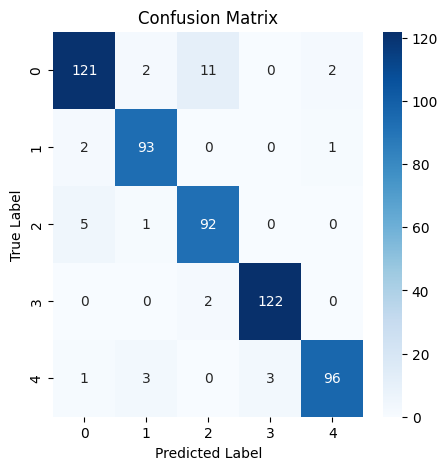

In [92]:
X_test= pad_sequences(X_test, max_seq_length)

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1) 
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(5))

# Visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [66]:
f1_score(y_pred,y_true,average=None)

array([0.89824561, 0.94565217, 0.89130435, 0.96      , 0.9478673 ])

In [93]:
f1_score(y_pred,y_true,average=None)

array([0.91320755, 0.95384615, 0.90640394, 0.97991968, 0.95049505])

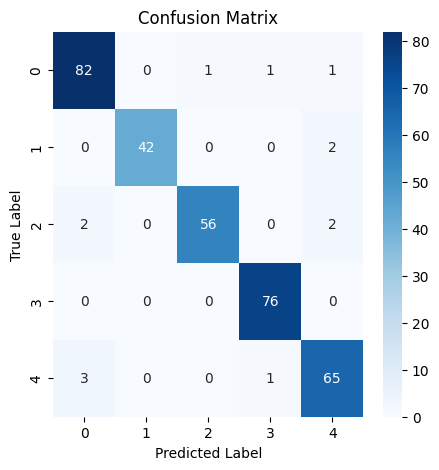

In [25]:
X_test= pad_sequences(X_test, max_seq_length)

predictions = classifier.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1) 
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(5))

# Visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [1]:
import spacy 
import numpy as np 
import pandas as pd
#df=pd.read_csv("data/bbc-text.csv")
nlp = spacy.load('en_core_web_lg')
 
# def preprocess_text(text, max_words=70):
#     # Process the text using SpaCy
#     doc = nlp(text)
    
#     # Filter out stopwords, punctuation, and spaces
#     tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
#     # Limit to the top 'max_words' words and pad if necessary
#     if len(tokens) > max_words:
#         tokens = tokens[:max_words]  # Keep the first max_words words
#     else:
#         tokens += ['<PAD>'] * (max_words - len(tokens))  # Pad the list with '<PAD>' token
    
#     # Join the tokens back into a string or return a list
#     return tokens
# df['processed_text'] = df['text'].apply(preprocess_text)
# df['processed_text']


# inputs = [] 
# # Process each phrase in the 'category' column
# for phrase in list(df['processed_text']):
#     doc = nlp(" ".join(phrase))  # Process the phrase with SpaCy
#     # Extract word vectors
#     matrix = np.array([token.vector for token in doc])
#     inputs.append(matrix)





In [2]:
def get_train_test_data(data_dir):
    # Get the train data
    train_data = pd.read_json(f"{data_dir}/train.json")
    train_data.drop(['id'], axis=1, inplace=True)

    # Get the test data
    test_data = pd.read_json(f"{data_dir}/test.json")
    test_data.drop(['id'], axis=1, inplace=True)
    
    return train_data, test_data

data_dir = "corpus"

df_train, df_test = get_train_test_data(data_dir)

# Take one example from the dataset and print it
 
 

In [3]:
df_train

,summary,dialogue
0,Amanda baked cookies and will bring Jerry some...,Amanda: I baked cookies. Do you want some?\r\...
1,Olivia and Olivier are voting for liberals in ...,Olivia: Who are you voting for in this electio...
2,Kim may try the pomodoro technique recommended...,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa..."
3,Edward thinks he is in love with Bella. Rachel...,"Edward: Rachel, I think I'm in ove with Bella...."
4,"Sam is confused, because he overheard Rick com...",Sam: hey overheard rick say something\r\nSam:...
...,...,...
14727,Romeo is trying to get Greta to add him to her...,Romeo: You are on my ‘People you may know’ lis...
14728,Theresa is at work. She gets free food and fre...,Theresa: <file_photo>\r\nTheresa: <file_photo>...
14729,Japan is going to hunt whales again. Island an...,John: Every day some bad news. Japan will hunt...
14730,Celia couldn't make it to the afternoon with t...,Jennifer: Dear Celia! How are you doing?\r\nJe...


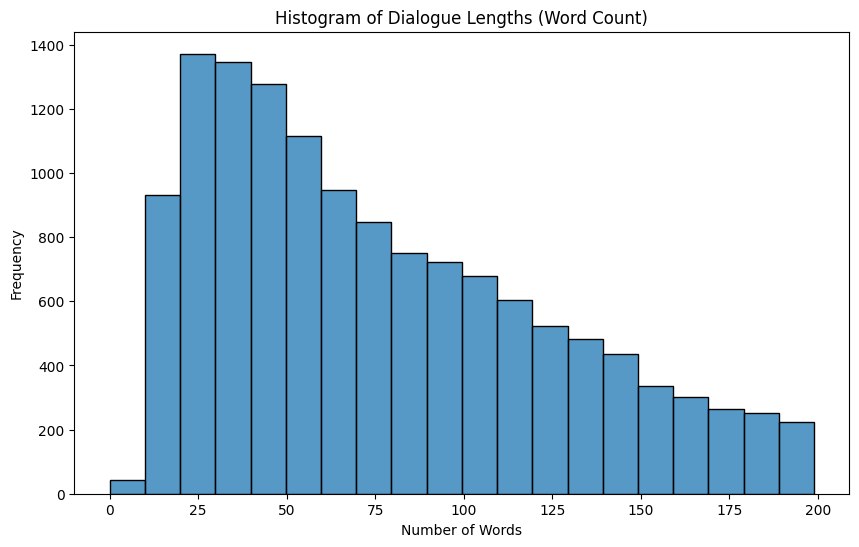

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate word count for each dialogue
df_train['word_count'] = df_train['dialogue'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['dialogue'].apply(lambda x: len(x.split()))

maxlen=200
# Filter out rows where word count is less than 300
df_train = df_train[df_train['word_count'] <  maxlen]
df_test = df_test[df_test['word_count'] <  maxlen]
# Plot histogram using Seaborn or Matplotlib
plt.figure(figsize=(10, 6))
sns.histplot(df_train['word_count'], bins=20, kde=False)
plt.title('Histogram of Dialogue Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [8]:
df_train

,summary,dialogue,word_count
0,Amanda baked cookies and will bring Jerry some...,Amanda: I baked cookies. Do you want some?\r\...,16
1,Olivia and Olivier are voting for liberals in ...,Olivia: Who are you voting for in this electio...,18
2,Kim may try the pomodoro technique recommended...,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",98
3,Edward thinks he is in love with Bella. Rachel...,"Edward: Rachel, I think I'm in ove with Bella....",26
4,"Sam is confused, because he overheard Rick com...",Sam: hey overheard rick say something\r\nSam:...,179
...,...,...,...
14725,Czar's profile on Kakaotalk shows a text in a ...,Dakarai: What does that mean on your profile s...,59
14726,"Barbara and Jess won't meet tonight, because B...","Jess: Hi, sorry but I can't come tonight :-(\r...",141
14727,Romeo is trying to get Greta to add him to her...,Romeo: You are on my ‘People you may know’ lis...,56
14728,Theresa is at work. She gets free food and fre...,Theresa: <file_photo>\r\nTheresa: <file_photo>...,198


In [9]:
def preprocess_text(text, max_words=300):
    # Process the text using SpaCy
    doc = nlp(text)
    
    # Filter out stopwords, punctuation, and spaces
    tokens = [token.text for token in doc if  not token.is_punct and not token.is_space]
    
    # Limit to the top 'max_words' words and pad if necessary
    if len(tokens) > max_words:
        tokens = tokens[:max_words]  # Keep the first max_words words
    else:
        tokens += ['<PAD>'] * (max_words - len(tokens))  # Pad the list with '<PAD>' token
    
    # Join the tokens back into a string or return a list
    return tokens
df_train['processed_text'] = df_train['dialogue'].apply(preprocess_text)
df_train['processed_text']

C:\Users\dials\AppData\Local\Temp\ipykernel_52444\1088077169.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['processed_text'] = df_train['dialogue'].apply(preprocess_text)


0        [Amanda, I, baked, cookies, Do, you, want, som...
1        [Olivia, Who, are, you, voting, for, in, this,...
2        [Tim, Hi, what, 's, up, Kim, Bad, mood, tbh, I...
3        [Edward, Rachel, I, think, I, 'm, in, ove, wit...
4        [Sam, hey, overheard, rick, say, something, Sa...
                               ...                        
14725    [Dakarai, What, does, that, mean, on, your, pr...
14726    [Jess, Hi, sorry, but, I, ca, n't, come, tonig...
14727    [Romeo, You, are, on, my, People, you, may, kn...
14728    [Theresa, <, file_photo, >, Theresa, <, file_p...
14729    [John, Every, day, some, bad, news, Japan, wil...
Name: processed_text, Length: 13459, dtype: object

In [9]:
def preprocess_text(text, max_words=300):
    # Process the text using SpaCy
    doc = nlp(text)
    
    # Filter out stopwords, punctuation, and spaces
    tokens = [token.text for token in doc if  not token.is_punct and not token.is_space]
    
    # Limit to the top 'max_words' words and pad if necessary
    if len(tokens) > max_words:
        tokens = tokens[:max_words]  # Keep the first max_words words
    else:
        tokens += ['<PAD>'] * (max_words - len(tokens))  # Pad the list with '<PAD>' token
    
    # Join the tokens back into a string or return a list
    return tokens
df_train['processed_text'] = df_train['dialogue'].apply(preprocess_text)
df_train['processed_text']

C:\Users\dials\AppData\Local\Temp\ipykernel_52444\1088077169.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['processed_text'] = df_train['dialogue'].apply(preprocess_text)


0        [Amanda, I, baked, cookies, Do, you, want, som...
1        [Olivia, Who, are, you, voting, for, in, this,...
2        [Tim, Hi, what, 's, up, Kim, Bad, mood, tbh, I...
3        [Edward, Rachel, I, think, I, 'm, in, ove, wit...
4        [Sam, hey, overheard, rick, say, something, Sa...
                               ...                        
14725    [Dakarai, What, does, that, mean, on, your, pr...
14726    [Jess, Hi, sorry, but, I, ca, n't, come, tonig...
14727    [Romeo, You, are, on, my, People, you, may, kn...
14728    [Theresa, <, file_photo, >, Theresa, <, file_p...
14729    [John, Every, day, some, bad, news, Japan, wil...
Name: processed_text, Length: 13459, dtype: object

In [11]:
all_words =  [x for sublist in [word for word in df_train["processed_text"]] for x in sublist]

# Get the unique words by converting to a set, then back to a listdialogue
unique_words = list(set(all_words))

len(unique_words)

31546

In [ ]:
dialogue

In [192]:
all_words

['Amanda:',
 'I',
 'baked',
 '',
 'cookies.',
 'Do',
 'you',
 'want',
 'some?\r\nJerry:',
 'Sure!\r\nAmanda:',
 "I'll",
 'bring',
 'you',
 'tomorrow',
 ':-)',
 'Olivia:',
 'Who',
 'are',
 'you',
 'voting',
 'for',
 'in',
 'this',
 'election?',
 '\r\nOliver:',
 'Liberals',
 'as',
 'always.\r\nOlivia:',
 'Me',
 'too!!\r\nOliver:',
 'Great',
 'Tim:',
 'Hi,',
 "what's",
 'up?\r\nKim:',
 'Bad',
 'mood',
 'tbh,',
 'I',
 'was',
 'going',
 'to',
 'do',
 'lots',
 'of',
 'stuff',
 'but',
 'ended',
 'up',
 'procrastinating\r\nTim:',
 'What',
 'did',
 'you',
 'plan',
 'on',
 'doing?\r\nKim:',
 'Oh',
 'you',
 'know,',
 'uni',
 'stuff',
 'and',
 'unfucking',
 'my',
 'room\r\nKim:',
 'Maybe',
 'tomorrow',
 "I'll",
 'move',
 'my',
 'ass',
 'and',
 'do',
 'everything\r\nKim:',
 'We',
 'were',
 'going',
 'to',
 'defrost',
 'a',
 'fridge',
 'so',
 'instead',
 'of',
 'shopping',
 "I'll",
 'eat',
 'some',
 'defrosted',
 'veggies\r\nTim:',
 'For',
 'doing',
 'stuff',
 'I',
 'recommend',
 'Pomodoro',
 'techn

In [135]:
n = 2
dialogue = train_data.iloc[n]["dialogue"]
summary = train_data.iloc[n]["summary"]

# Tokenize the dialogue and summary into words
dialogue_words =[x.lower() for x in df_train["processed_text"].iloc[n]] 
summary_words = [x.lower() for x in summary.split()] 

# Create a binary copy of dialogue where words in summary are 1, others are 0 
# Show the binary representation
print("Original Dialogue: ", dialogue_words)
print("Binary Dialogue: ", binary_dialogue)
print("Original summary: ", summary_words)

Original Dialogue:  ['tim', 'hi', 'what', "'s", 'up', 'kim', 'bad', 'mood', 'tbh', 'i', 'was', 'going', 'to', 'do', 'lots', 'of', 'stuff', 'but', 'ended', 'up', 'procrastinating', 'tim', 'what', 'did', 'you', 'plan', 'on', 'doing', 'kim', 'oh', 'you', 'know', 'uni', 'stuff', 'and', 'unfucking', 'my', 'room', 'kim', 'maybe', 'tomorrow', 'i', "'ll", 'move', 'my', 'ass', 'and', 'do', 'everything', 'kim', 'we', 'were', 'going', 'to', 'defrost', 'a', 'fridge', 'so', 'instead', 'of', 'shopping', 'i', "'ll", 'eat', 'some', 'defrosted', 'veggies', 'tim', 'for', 'doing', 'stuff', 'i', 'recommend', 'pomodoro', 'technique', 'where', 'u', 'use', 'breaks', 'for', 'doing', 'chores', 'tim', 'it', 'really', 'helps', 'kim', 'thanks', 'maybe', 'i', "'ll", 'do', 'that', 'tim', 'i', 'also', 'like', 'using', 'post', 'its', 'in', 'kaban', 'style', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', 

In [136]:
dialogue_words

['tim',
 'hi',
 'what',
 "'s",
 'up',
 'kim',
 'bad',
 'mood',
 'tbh',
 'i',
 'was',
 'going',
 'to',
 'do',
 'lots',
 'of',
 'stuff',
 'but',
 'ended',
 'up',
 'procrastinating',
 'tim',
 'what',
 'did',
 'you',
 'plan',
 'on',
 'doing',
 'kim',
 'oh',
 'you',
 'know',
 'uni',
 'stuff',
 'and',
 'unfucking',
 'my',
 'room',
 'kim',
 'maybe',
 'tomorrow',
 'i',
 "'ll",
 'move',
 'my',
 'ass',
 'and',
 'do',
 'everything',
 'kim',
 'we',
 'were',
 'going',
 'to',
 'defrost',
 'a',
 'fridge',
 'so',
 'instead',
 'of',
 'shopping',
 'i',
 "'ll",
 'eat',
 'some',
 'defrosted',
 'veggies',
 'tim',
 'for',
 'doing',
 'stuff',
 'i',
 'recommend',
 'pomodoro',
 'technique',
 'where',
 'u',
 'use',
 'breaks',
 'for',
 'doing',
 'chores',
 'tim',
 'it',
 'really',
 'helps',
 'kim',
 'thanks',
 'maybe',
 'i',
 "'ll",
 'do',
 'that',
 'tim',
 'i',
 'also',
 'like',
 'using',
 'post',
 'its',
 'in',
 'kaban',
 'style',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',


In [137]:
summary_words

['kim',
 'may',
 'try',
 'the',
 'pomodoro',
 'technique',
 'recommended',
 'by',
 'tim',
 'to',
 'get',
 'more',
 'stuff',
 'done.']

In [138]:
[x for x in summary_words if x in dialogue_words]

['kim', 'pomodoro', 'technique', 'tim', 'to', 'stuff']

36898

In [141]:
list(set(df_train["processed_text"].tolist()))

TypeError: unhashable type: 'list'

In [152]:
n=4
print(train_data.iloc[n]["dialogue"],"\n\n")
print(train_data.iloc[n]["summary"])

Sam: hey  overheard rick say something
Sam: i don't know what to do :-/
Naomi: what did he say??
Sam: he was talking on the phone with someone
Sam: i don't know who
Sam: and he was telling them that he wasn't very happy here
Naomi: damn!!!
Sam: he was saying he doesn't like being my roommate
Naomi: wow, how do you feel about it?
Sam: i thought i was a good rommate
Sam: and that we have a nice place
Naomi: that's true man!!!
Naomi: i used to love living with you before i moved in with me boyfriend
Naomi: i don't know why he's saying that
Sam: what should i do???
Naomi: honestly if it's bothering you that much you should talk to him
Naomi: see what's going on
Sam: i don't want to get in any kind of confrontation though
Sam: maybe i'll just let it go
Sam: and see how it goes in the future
Naomi: it's your choice sam
Naomi: if i were you i would just talk to him and clear the air 


Sam is confused, because he overheard Rick complaining about him as a roommate. Naomi thinks Sam should talk

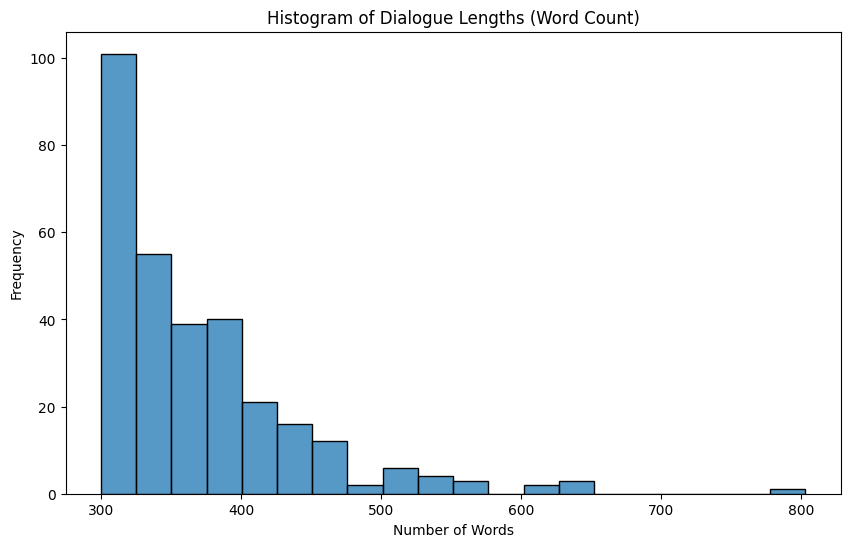